In [57]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

In [58]:
def plt_data_t(title, number_of_points):
    plt.title(title, fontsize=10)
    plt.draw()
    pts = np.asarray(plt.ginput(number_of_points, timeout=-1))
    return pts

In [59]:
def populate_data():
    positive, negative = get_data(10)
    X = list()
    Y = list()
    for i in range(len(positive)):
        data = [positive[i][0], positive[i][1], 1]
        X.append(np.array(data))
        Y.append(1)
    for i in range(len(negative)):
        data = [negative[i][0], negative[i][1], 1]
        X.append(np.array(data))
        Y.append(-1)
    return positive, negative, X, Y

In [60]:
def get_data(number_of_points):
    plt.clf()
    plt.setp(plt.gca(), autoscale_on=False)
    positive = plt_data_t("Positive Class", number_of_points)
    negative = plt_data_t("Negative Class", number_of_points)

    plt.title("DATA", fontsize=10)
    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")
    plt.show()
    return positive, negative

#### Get Positive and Negative Data Points, This block of code will load a Interactive GUI which will wait for user to provide input

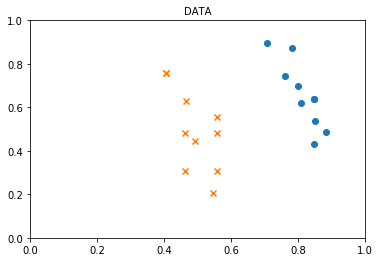

In [61]:
positive, negative, X, Y = populate_data()

$$w^T * x =\begin{cases}\text{positive values } & w^T* x \geq 0\\\text{negative values } & w^T* x <  0\end{cases}$$

In [62]:
def decision_rule(w, x):
    return np.dot(w, x)

 $$\text{sigmoid = }\frac{1}{1+ e^{- (w^{T}*x *y)}}$$

In [63]:
def sigmoid(w, x, y):
    z = decision_rule(w, x)
    return 1 / (1 + np.exp(-z * y))

In [64]:
def expo(w, x, y):
    z = decision_rule(w, x)
    return np.exp(-z * y)

$$\text{gradient = }(\frac{1}{1+ e^{- (w^{T}*x *y)}}) *  (e^{- (w^{T}*x *y)}) * (-y*x)$$

In [65]:
def gradient(w, x, y):
    return sigmoid(w, x, y) * expo(w, x, y) * (-y * x)

$$\text{loss = } \log\frac{1}{1+ e^{- (w^{T}*x *y)}}$$


In [66]:
def loss(w, x, y):
    return np.log(1 + expo(w, x, y)).mean()

In [67]:
def train(w, lr, num_iter):
    for num_iter in range(num_iter):
        for iterator in range(len(X)):
            x = X[iterator]
            y = Y[iterator]
            w -= lr * gradient(w, x, y)
            print("Step: {} Loss : {}".format(num_iter, loss(w, x, y)))
    return w

In [68]:
W = train(np.array([0.0, 0.0, 0.0]), 0.001, 3000)

Step: 0 Loss : 0.6925710090772303
Step: 0 Loss : 0.6919698424893793
Step: 0 Loss : 0.6915093850447404
Step: 0 Loss : 0.6909713421872534
Step: 0 Loss : 0.6905266030504428
Step: 0 Loss : 0.689942615308539
Step: 0 Loss : 0.6894141141111166
Step: 0 Loss : 0.6892041706325215
Step: 0 Loss : 0.6885542839968337
Step: 0 Loss : 0.6880714466422475
Step: 0 Loss : 0.697281651840685
Step: 0 Loss : 0.6968429407035206
Step: 0 Loss : 0.6963834213752795
Step: 0 Loss : 0.6960529916311918
Step: 0 Loss : 0.6955936811992601
Step: 0 Loss : 0.695106467730358
Step: 0 Loss : 0.6947309952482978
Step: 0 Loss : 0.6942965088170838
Step: 0 Loss : 0.6940467555669267
Step: 0 Loss : 0.6936538228810805
Step: 1 Loss : 0.691660681032771
Step: 1 Loss : 0.6910104080487904
Step: 1 Loss : 0.6906064506532206
Step: 1 Loss : 0.69008186639246
Step: 1 Loss : 0.689649548854626
Step: 1 Loss : 0.6890284226103125
Step: 1 Loss : 0.6885008939357102
Step: 1 Loss : 0.6883738876233819
Step: 1 Loss : 0.6876805673608286
Step: 1 Loss : 0.6871

Step: 33 Loss : 0.7095995360227568
Step: 33 Loss : 0.7076492692608605
Step: 34 Loss : 0.6657835478556561
Step: 34 Loss : 0.6636227396801901
Step: 34 Loss : 0.6648588896205659
Step: 34 Loss : 0.6647646381848062
Step: 34 Loss : 0.6646522832997681
Step: 34 Loss : 0.662903818906918
Step: 34 Loss : 0.6624040719878609
Step: 34 Loss : 0.6647138536381676
Step: 34 Loss : 0.6627396994398249
Step: 34 Loss : 0.6620729877022743
Step: 34 Loss : 0.7150505068341957
Step: 34 Loss : 0.7145963357031874
Step: 34 Loss : 0.7140559164768376
Step: 34 Loss : 0.7152121849698515
Step: 34 Loss : 0.7138021458378825
Step: 34 Loss : 0.7111094792440678
Step: 34 Loss : 0.7104054932722471
Step: 34 Loss : 0.7077518973663405
Step: 34 Loss : 0.7099925079176185
Step: 34 Loss : 0.707998143772792
Step: 35 Loss : 0.6651113101525802
Step: 35 Loss : 0.6629076390135368
Step: 35 Loss : 0.6641875391937034
Step: 35 Loss : 0.6641059613006856
Step: 35 Loss : 0.6640009135548023
Step: 35 Loss : 0.6622208913114781
Step: 35 Loss : 0.6617

Step: 68 Loss : 0.7210707117359242
Step: 68 Loss : 0.7165024723997505
Step: 68 Loss : 0.7210689460974653
Step: 68 Loss : 0.7176698063169956
Step: 69 Loss : 0.6453689540499349
Step: 69 Loss : 0.6417866196640405
Step: 69 Loss : 0.6443925322911429
Step: 69 Loss : 0.6447318871957297
Step: 69 Loss : 0.6448102365615396
Step: 69 Loss : 0.6420278614238838
Step: 69 Loss : 0.6415502833568149
Step: 69 Loss : 0.6459489813286327
Step: 69 Loss : 0.6428679963551202
Step: 69 Loss : 0.641990221188562
Step: 69 Loss : 0.7277097335441791
Step: 69 Loss : 0.7272445546214108
Step: 69 Loss : 0.7267477083417737
Step: 69 Loss : 0.7294096045034851
Step: 69 Loss : 0.7271521491478471
Step: 69 Loss : 0.7223719203518062
Step: 69 Loss : 0.7213217733549636
Step: 69 Loss : 0.7167011934917801
Step: 69 Loss : 0.7213338294640769
Step: 69 Loss : 0.7178959482234046
Step: 70 Loss : 0.6448695494871716
Step: 70 Loss : 0.6412486900622951
Step: 70 Loss : 0.6438894389432122
Step: 70 Loss : 0.6442409174132433
Step: 70 Loss : 0.644

Step: 99 Loss : 0.7213662319820258
Step: 99 Loss : 0.7279302546351756
Step: 99 Loss : 0.7233893735448497
Step: 100 Loss : 0.6316300654669001
Step: 100 Loss : 0.6268958330484539
Step: 100 Loss : 0.6304941210306075
Step: 100 Loss : 0.6312039167917195
Step: 100 Loss : 0.631361967610903
Step: 100 Loss : 0.6277603335158756
Step: 100 Loss : 0.6272978784089128
Step: 100 Loss : 0.6332499349673847
Step: 100 Loss : 0.6293392298058146
Step: 100 Loss : 0.6282615238114045
Step: 100 Loss : 0.7352821674571656
Step: 100 Loss : 0.7348104080999514
Step: 100 Loss : 0.7344343695172807
Step: 100 Loss : 0.7384051702508266
Step: 100 Loss : 0.7354873250352975
Step: 100 Loss : 0.7289884656697129
Step: 100 Loss : 0.7276284766857045
Step: 100 Loss : 0.7214822886970533
Step: 100 Loss : 0.7281090061727421
Step: 100 Loss : 0.7235331941447896
Step: 101 Loss : 0.6312411153683084
Step: 101 Loss : 0.6264710308808097
Step: 101 Loss : 0.630098628756081
Step: 101 Loss : 0.6308202079212957
Step: 101 Loss : 0.63097973493942

Step: 132 Loss : 0.6205571581791129
Step: 132 Loss : 0.6147081602349056
Step: 132 Loss : 0.6191769725719922
Step: 132 Loss : 0.6202596801878891
Step: 132 Loss : 0.6204376203953397
Step: 132 Loss : 0.6160575122878517
Step: 132 Loss : 0.6156074386250031
Step: 132 Loss : 0.6229556367847099
Step: 132 Loss : 0.6182935850502845
Step: 132 Loss : 0.6170003671963217
Step: 132 Loss : 0.7403719497341863
Step: 132 Loss : 0.7398957695336942
Step: 132 Loss : 0.7397056116624036
Step: 132 Loss : 0.745002730670349
Step: 132 Loss : 0.741474164452103
Step: 132 Loss : 0.7333074335450163
Step: 132 Loss : 0.7316267227186611
Step: 132 Loss : 0.7240756795092538
Step: 132 Loss : 0.7326574497094233
Step: 132 Loss : 0.7270178577482433
Step: 133 Loss : 0.6202524136256391
Step: 133 Loss : 0.6143695494764686
Step: 133 Loss : 0.6188635534473786
Step: 133 Loss : 0.6199577899946377
Step: 133 Loss : 0.6201355348989204
Step: 133 Loss : 0.6157319796136129
Step: 133 Loss : 0.6152822500190737
Step: 133 Loss : 0.62267136154

Step: 164 Loss : 0.6115851181148881
Step: 164 Loss : 0.6117369812131578
Step: 164 Loss : 0.6066280152305692
Step: 164 Loss : 0.6061878996862934
Step: 164 Loss : 0.6147792314479906
Step: 164 Loss : 0.6094433908296227
Step: 164 Loss : 0.6079279934391646
Step: 164 Loss : 0.7433488451506619
Step: 164 Loss : 0.742870080205718
Step: 164 Loss : 0.7429125185860228
Step: 164 Loss : 0.7495117038025094
Step: 164 Loss : 0.7454298056459883
Step: 164 Loss : 0.7356840127301647
Step: 164 Loss : 0.7336832100846142
Step: 164 Loss : 0.7248647594102675
Step: 164 Loss : 0.7353134843888057
Step: 164 Loss : 0.728700143753467
Step: 165 Loss : 0.6115770866569501
Step: 165 Loss : 0.604635563765118
Step: 165 Loss : 0.6098838238762062
Step: 165 Loss : 0.6113437291524765
Step: 165 Loss : 0.6114941837355957
Step: 165 Loss : 0.6063630856871209
Step: 165 Loss : 0.6059232496656379
Step: 165 Loss : 0.614551446184572
Step: 165 Loss : 0.6091955546614054
Step: 165 Loss : 0.6076731296467276
Step: 165 Loss : 0.7434137781452

Step: 195 Loss : 0.7442234141055856
Step: 195 Loss : 0.7445242382559251
Step: 195 Loss : 0.7523631886535626
Step: 195 Loss : 0.74778854843934
Step: 195 Loss : 0.7365824577279366
Step: 195 Loss : 0.7342731427105638
Step: 195 Loss : 0.7243308566445661
Step: 195 Loss : 0.73651787079739
Step: 195 Loss : 0.7290295998803409
Step: 196 Loss : 0.6048120571678616
Step: 196 Loss : 0.5968830680436892
Step: 196 Loss : 0.6027836060217365
Step: 196 Loss : 0.6045926988658474
Step: 196 Loss : 0.6046850239307442
Step: 196 Loss : 0.5988837369025635
Step: 196 Loss : 0.5984517859283697
Step: 196 Loss : 0.6081741316615571
Step: 196 Loss : 0.6022213174912588
Step: 196 Loss : 0.6004790451976642
Step: 196 Loss : 0.7447263644751722
Step: 196 Loss : 0.7442464037136486
Step: 196 Loss : 0.7445560007737759
Step: 196 Loss : 0.7524346083789355
Step: 196 Loss : 0.747844676407005
Step: 196 Loss : 0.7365924718712605
Step: 196 Loss : 0.7342732384226458
Step: 196 Loss : 0.7242961523902637
Step: 196 Loss : 0.73653821902923

Step: 232 Loss : 0.5982026843185049
Step: 232 Loss : 0.5916549753958118
Step: 232 Loss : 0.5912306330043372
Step: 232 Loss : 0.6021270347781649
Step: 232 Loss : 0.5955299537864713
Step: 232 Loss : 0.5935286904912768
Step: 232 Loss : 0.7448502237740323
Step: 232 Loss : 0.7443701554986146
Step: 232 Loss : 0.7450100937167339
Step: 232 Loss : 0.7543032584231772
Step: 232 Loss : 0.7491840238882164
Step: 232 Loss : 0.7363076196624129
Step: 232 Loss : 0.733632960976194
Step: 232 Loss : 0.7224543795454449
Step: 232 Loss : 0.736640752421267
Step: 232 Loss : 0.728177626579279
Step: 233 Loss : 0.5982919086415931
Step: 233 Loss : 0.5892209564206051
Step: 233 Loss : 0.5958261355431432
Step: 233 Loss : 0.5980468894699206
Step: 233 Loss : 0.5980403186410844
Step: 233 Loss : 0.591472278173394
Step: 233 Loss : 0.5910481279127058
Step: 233 Loss : 0.6019759394056403
Step: 233 Loss : 0.595361571784074
Step: 233 Loss : 0.5933530732247208
Step: 233 Loss : 0.7448361884511129
Step: 233 Loss : 0.74435613235874

Step: 262 Loss : 0.7549990532756794
Step: 262 Loss : 0.7494655004388592
Step: 262 Loss : 0.7352822703850584
Step: 262 Loss : 0.7323141038952163
Step: 262 Loss : 0.7201994310893827
Step: 262 Loss : 0.7359563204834974
Step: 262 Loss : 0.7267467853242048
Step: 263 Loss : 0.5939271438522167
Step: 263 Loss : 0.5839528290458958
Step: 263 Loss : 0.5910854105411949
Step: 263 Loss : 0.5936365501062386
Step: 263 Loss : 0.593532627693003
Step: 263 Loss : 0.5863631247963936
Step: 263 Loss : 0.5859443440263207
Step: 263 Loss : 0.597789547174143
Step: 263 Loss : 0.5906692052486172
Step: 263 Loss : 0.5884429317934642
Step: 263 Loss : 0.7440561508022636
Step: 263 Loss : 0.7435767718299591
Step: 263 Loss : 0.7445191295965019
Step: 263 Loss : 0.7550112333674558
Step: 263 Loss : 0.7494642239120386
Step: 263 Loss : 0.7352380711054856
Step: 263 Loss : 0.732260165893829
Step: 263 Loss : 0.7201151581781109
Step: 263 Loss : 0.7359237046665322
Step: 263 Loss : 0.7266898673516687
Step: 264 Loss : 0.593793173302

Step: 293 Loss : 0.74221786184022
Step: 293 Loss : 0.7434639519983027
Step: 293 Loss : 0.7551009453409645
Step: 293 Loss : 0.7491593925827846
Step: 293 Loss : 0.7336625858063142
Step: 293 Loss : 0.7303939166635753
Step: 293 Loss : 0.7173614957006247
Step: 293 Loss : 0.734700910588892
Step: 293 Loss : 0.724753126633447
Step: 294 Loss : 0.590062132154835
Step: 294 Loss : 0.5791712051434836
Step: 294 Loss : 0.5868176406529055
Step: 294 Loss : 0.5897073824781716
Step: 294 Loss : 0.5894911344535901
Step: 294 Loss : 0.5817150171220257
Step: 294 Loss : 0.5813011152603522
Step: 294 Loss : 0.59405148878034
Step: 294 Loss : 0.5864300199380049
Step: 294 Loss : 0.5839777465544916
Step: 294 Loss : 0.7426424609968162
Step: 294 Loss : 0.7421643093196195
Step: 294 Loss : 0.7434206702087675
Step: 294 Loss : 0.7550955809773199
Step: 294 Loss : 0.7491411593679305
Step: 294 Loss : 0.733602532178346
Step: 294 Loss : 0.7303242181552487
Step: 294 Loss : 0.717262918711599
Step: 294 Loss : 0.734652765009531
St

Step: 324 Loss : 0.7403524545493472
Step: 324 Loss : 0.7419203406780255
Step: 324 Loss : 0.7547258053716922
Step: 324 Loss : 0.7483926550332833
Step: 324 Loss : 0.7316137807690227
Step: 324 Loss : 0.7280475647354019
Step: 324 Loss : 0.7141383200316229
Step: 324 Loss : 0.7330247483140953
Step: 324 Loss : 0.7223661292801254
Step: 325 Loss : 0.5866961225681979
Step: 325 Loss : 0.5749028511603699
Step: 325 Loss : 0.5830385305208182
Step: 325 Loss : 0.5862642526747471
Step: 325 Loss : 0.585926868718517
Step: 325 Loss : 0.5775564954339899
Step: 325 Loss : 0.5771469534562321
Step: 325 Loss : 0.5907683928739702
Step: 325 Loss : 0.5826631204769039
Step: 325 Loss : 0.579984489749052
Step: 325 Loss : 0.7407623819351248
Step: 325 Loss : 0.7402858626952497
Step: 325 Loss : 0.7418642314894259
Step: 325 Loss : 0.7547071554914172
Step: 325 Loss : 0.7483616078590667
Step: 325 Loss : 0.7315418448411141
Step: 325 Loss : 0.7279660805303392
Step: 325 Loss : 0.714029143881646
Step: 325 Loss : 0.732964937302

Step: 356 Loss : 0.5763513967713209
Step: 356 Loss : 0.7385327407074098
Step: 356 Loss : 0.7380581577748779
Step: 356 Loss : 0.7399638365572742
Step: 356 Loss : 0.7539611443211869
Step: 356 Loss : 0.7472375856226869
Step: 356 Loss : 0.72916332838714
Step: 356 Loss : 0.725293129512563
Step: 356 Loss : 0.710513853003572
Step: 356 Loss : 0.7309646458099811
Step: 356 Loss : 0.7195958679243721
Step: 357 Loss : 0.5836184859819404
Step: 357 Loss : 0.5709065639259288
Step: 357 Loss : 0.5795270042736808
Step: 357 Loss : 0.5830969260148294
Step: 357 Loss : 0.5826277637442342
Step: 357 Loss : 0.5736547842021609
Step: 357 Loss : 0.5732493282622328
Step: 357 Loss : 0.587741565580721
Step: 357 Loss : 0.5791513189057697
Step: 357 Loss : 0.5762391842088401
Step: 357 Loss : 0.7384560643554481
Step: 357 Loss : 0.7379815480182511
Step: 357 Loss : 0.7398978489799635
Step: 357 Loss : 0.7539321796906471
Step: 357 Loss : 0.7471966160298267
Step: 357 Loss : 0.729082290659689
Step: 357 Loss : 0.725202644368684

Step: 387 Loss : 0.7529453872965287
Step: 387 Loss : 0.7458544720823617
Step: 387 Loss : 0.7265486560367825
Step: 387 Loss : 0.722387054138634
Step: 387 Loss : 0.7067930366910039
Step: 387 Loss : 0.7287313864728052
Step: 387 Loss : 0.7166936443113949
Step: 388 Loss : 0.5809294368583027
Step: 388 Loss : 0.5673385029395297
Step: 388 Loss : 0.5764128892215833
Step: 388 Loss : 0.5803137794666227
Step: 388 Loss : 0.5797122608608605
Step: 388 Loss : 0.5701644948967534
Step: 388 Loss : 0.5697626902135865
Step: 388 Loss : 0.5850763130911384
Step: 388 Loss : 0.576027572859095
Step: 388 Loss : 0.5728897876692087
Step: 388 Loss : 0.7359586342723369
Step: 388 Loss : 0.7354862872480373
Step: 388 Loss : 0.7377332430829509
Step: 388 Loss : 0.7529089328214209
Step: 388 Loss : 0.7458063220015133
Step: 388 Loss : 0.7264611253291836
Step: 388 Loss : 0.7222901737424889
Step: 388 Loss : 0.7066702811067761
Step: 388 Loss : 0.7286561928244074
Step: 388 Loss : 0.7165971471290397
Step: 389 Loss : 0.58084665939

Step: 421 Loss : 0.5666881928764933
Step: 421 Loss : 0.5662900210033174
Step: 421 Loss : 0.582458302838286
Step: 421 Loss : 0.5729315796145953
Step: 421 Loss : 0.5695545404516758
Step: 421 Loss : 0.7330914132141799
Step: 421 Loss : 0.7326215572442608
Step: 421 Loss : 0.7352223368974157
Step: 421 Loss : 0.7516001145613966
Step: 421 Loss : 0.7441162943136188
Step: 421 Loss : 0.7234826617213811
Step: 421 Loss : 0.719004929602926
Step: 421 Loss : 0.7025438567010068
Step: 421 Loss : 0.7260854558327982
Step: 421 Loss : 0.713332037417005
Step: 422 Loss : 0.5782304911296954
Step: 422 Loss : 0.5636866524918445
Step: 422 Loss : 0.5732445926559878
Step: 422 Loss : 0.5775057053702494
Step: 422 Loss : 0.5767553100887929
Step: 422 Loss : 0.5665860566428106
Step: 422 Loss : 0.5661879914453087
Step: 422 Loss : 0.5823818914254217
Step: 422 Loss : 0.5728408278105633
Step: 422 Loss : 0.569456557080624
Step: 422 Loss : 0.7330018335886783
Step: 422 Loss : 0.7325320554547681
Step: 422 Loss : 0.7351435717699

Step: 445 Loss : 0.7241258431316278
Step: 445 Loss : 0.7108770296480283
Step: 446 Loss : 0.5764476296318339
Step: 446 Loss : 0.5612376987248008
Step: 446 Loss : 0.5711294236961455
Step: 446 Loss : 0.5756430625601783
Step: 446 Loss : 0.5747859464458331
Step: 446 Loss : 0.5641830902805738
Step: 446 Loss : 0.5637875338611005
Step: 446 Loss : 0.5805917853024963
Step: 446 Loss : 0.5707088576515054
Step: 446 Loss : 0.5671513988793129
Step: 446 Loss : 0.7308129556457255
Step: 446 Loss : 0.730345079594247
Step: 446 Loss : 0.7332143466265946
Step: 446 Loss : 0.7504944474374465
Step: 446 Loss : 0.7427273073065401
Step: 446 Loss : 0.7211309334016235
Step: 446 Loss : 0.7164230512639356
Step: 446 Loss : 0.699339613358481
Step: 446 Loss : 0.7240428518894637
Step: 446 Loss : 0.7107735572897822
Step: 447 Loss : 0.5763751970165861
Step: 447 Loss : 0.5611376253216928
Step: 447 Loss : 0.5710431365645002
Step: 447 Loss : 0.5755672658617861
Step: 447 Loss : 0.5747056806057683
Step: 447 Loss : 0.56408484420

Step: 469 Loss : 0.5650160298649138
Step: 469 Loss : 0.7286557542253977
Step: 469 Loss : 0.7281897530197434
Step: 469 Loss : 0.731305926012379
Step: 469 Loss : 0.7494101089782789
Step: 469 Loss : 0.741385901962585
Step: 469 Loss : 0.7189130465406126
Step: 469 Loss : 0.7139951294655259
Step: 469 Loss : 0.696349110051896
Step: 469 Loss : 0.7221090768019512
Step: 469 Loss : 0.7083720227439576
Step: 470 Loss : 0.5747450553280198
Step: 470 Loss : 0.5588741773986934
Step: 470 Loss : 0.5690943005335857
Step: 470 Loss : 0.5738590122092614
Step: 470 Loss : 0.5728942437762871
Step: 470 Loss : 0.5618617010701897
Step: 470 Loss : 0.561468566432142
Step: 470 Loss : 0.5788751850989723
Step: 470 Loss : 0.5686545063454422
Step: 470 Loss : 0.5649246273015696
Step: 470 Loss : 0.7285608538777457
Step: 470 Loss : 0.7280949351573088
Step: 470 Loss : 0.731221836257175
Step: 470 Loss : 0.7493617207694094
Step: 470 Loss : 0.741326408493071
Step: 470 Loss : 0.7188156357427647
Step: 470 Loss : 0.713888623487134

Step: 500 Loss : 0.5661753138620316
Step: 500 Loss : 0.5622311007406001
Step: 500 Loss : 0.7256786595692721
Step: 500 Loss : 0.7252152462300187
Step: 500 Loss : 0.7286635554034059
Step: 500 Loss : 0.747869655921189
Step: 500 Loss : 0.7395037258342024
Step: 500 Loss : 0.7158624389678699
Step: 500 Loss : 0.7106639850647876
Step: 500 Loss : 0.6922732801243175
Step: 500 Loss : 0.719440446732414
Step: 500 Loss : 0.705082266926657
Step: 501 Loss : 0.5726415888278801
Step: 501 Loss : 0.5559243182572483
Step: 501 Loss : 0.5665615908298768
Step: 501 Loss : 0.5716484410753768
Step: 501 Loss : 0.5705437079838024
Step: 501 Loss : 0.5589616281784648
Step: 501 Loss : 0.558571516449028
Step: 501 Loss : 0.5767456171246149
Step: 501 Loss : 0.5660941421604687
Step: 501 Loss : 0.5621428086460509
Step: 501 Loss : 0.7255815495985074
Step: 501 Loss : 0.7251182206812165
Step: 501 Loss : 0.728577226074844
Step: 501 Loss : 0.7478187085544965
Step: 501 Loss : 0.7394418384374921
Step: 501 Loss : 0.71576309456256

Step: 532 Loss : 0.5695220154127327
Step: 532 Loss : 0.5682767359485537
Step: 532 Loss : 0.556150989176456
Step: 532 Loss : 0.5557638043291663
Step: 532 Loss : 0.5746946468162768
Step: 532 Loss : 0.5636179459835107
Step: 532 Loss : 0.5594466893722657
Step: 532 Loss : 0.7225453001196832
Step: 532 Loss : 0.722084610994852
Step: 532 Loss : 0.7258744894551117
Step: 532 Loss : 0.7462078766405269
Step: 532 Loss : 0.737494219885753
Step: 532 Loss : 0.712661195434364
Step: 532 Loss : 0.707176191429091
Step: 532 Loss : 0.6880314792096284
Step: 532 Loss : 0.716631821676146
Step: 532 Loss : 0.7016426199559803
Step: 533 Loss : 0.5705598615289542
Step: 533 Loss : 0.5529772870845722
Step: 533 Loss : 0.5640378014411975
Step: 533 Loss : 0.5694546053864988
Step: 533 Loss : 0.5682047869846288
Step: 533 Loss : 0.5560615973321322
Step: 533 Loss : 0.5556745055276959
Step: 533 Loss : 0.5746295919827797
Step: 533 Loss : 0.5635392610539401
Step: 533 Loss : 0.5593609368286905
Step: 533 Loss : 0.722446632277974

Step: 563 Loss : 0.7355015762564029
Step: 563 Loss : 0.7095270007346727
Step: 563 Loss : 0.7037673011940727
Step: 563 Loss : 0.6839050064821527
Step: 563 Loss : 0.7138759254213918
Step: 563 Loss : 0.6982843237784295
Step: 564 Loss : 0.568611001839659
Step: 564 Loss : 0.550198080127543
Step: 564 Loss : 0.5616622368122964
Step: 564 Loss : 0.5673961697998231
Step: 564 Loss : 0.5660055968855667
Step: 564 Loss : 0.5533245418316189
Step: 564 Loss : 0.5529402974734621
Step: 564 Loss : 0.5726420620852275
Step: 564 Loss : 0.5611317443641759
Step: 564 Loss : 0.5567351810985319
Step: 564 Loss : 0.719371089105034
Step: 564 Loss : 0.7189131601997383
Step: 564 Loss : 0.7230428860847415
Step: 564 Loss : 0.744493622355554
Step: 564 Loss : 0.7354367120658074
Step: 564 Loss : 0.7094255151869618
Step: 564 Loss : 0.7036570015592915
Step: 564 Loss : 0.6837717571097433
Step: 564 Loss : 0.7137866057436812
Step: 564 Loss : 0.6981757092452564
Step: 565 Loss : 0.5685490758414805
Step: 565 Loss : 0.5501094965558

Step: 597 Loss : 0.5504738854410053
Step: 597 Loss : 0.5500926037852409
Step: 597 Loss : 0.5705793411399127
Step: 597 Loss : 0.5586271014692644
Step: 597 Loss : 0.5540000969540637
Step: 597 Loss : 0.716071229952254
Step: 597 Loss : 0.7156161709929768
Step: 597 Loss : 0.7200942329203642
Step: 597 Loss : 0.7426871835834705
Step: 597 Loss : 0.7332804627714017
Step: 597 Loss : 0.7060675996182503
Step: 597 Loss : 0.7000098554142933
Step: 597 Loss : 0.6793738435870175
Step: 597 Loss : 0.7108287527368587
Step: 597 Loss : 0.6945856947759699
Step: 598 Loss : 0.5665335984403809
Step: 598 Loss : 0.5472187473778914
Step: 598 Loss : 0.5591190634699256
Step: 598 Loss : 0.565197953686913
Step: 598 Loss : 0.563653112843426
Step: 598 Loss : 0.5503883823366982
Step: 598 Loss : 0.550007189497885
Step: 598 Loss : 0.5705175621460908
Step: 598 Loss : 0.5585520103623292
Step: 598 Loss : 0.5539180537425761
Step: 598 Loss : 0.7159709556300073
Step: 598 Loss : 0.715515983887918
Step: 598 Loss : 0.72000456491218

Step: 629 Loss : 0.707948123704268
Step: 629 Loss : 0.6911001419337073
Step: 630 Loss : 0.5646238113927694
Step: 630 Loss : 0.5444683381636315
Step: 630 Loss : 0.5567733820642243
Step: 630 Loss : 0.5631741906348658
Step: 630 Loss : 0.5614845022567833
Step: 630 Loss : 0.5476762357901246
Step: 630 Loss : 0.5472978587728092
Step: 630 Loss : 0.5685600327855214
Step: 630 Loss : 0.5561708690514376
Step: 630 Loss : 0.5513154251052343
Step: 630 Loss : 0.71275702399134
Step: 630 Loss : 0.7123048478759321
Step: 630 Loss : 0.7171288387239373
Step: 630 Loss : 0.7408541018286182
Step: 630 Loss : 0.7311013983785295
Step: 630 Loss : 0.7026996827091918
Step: 630 Loss : 0.6963558501715076
Step: 630 Loss : 0.6749812178451273
Step: 630 Loss : 0.7078579984999481
Step: 630 Loss : 0.6909912356499633
Step: 631 Loss : 0.564564736590425
Step: 631 Loss : 0.5443831216837542
Step: 631 Loss : 0.556700727264508
Step: 631 Loss : 0.5631115527592612
Step: 631 Loss : 0.561417345394712
Step: 631 Loss : 0.547592182738563

Step: 662 Loss : 0.6994324154762334
Step: 662 Loss : 0.6928141244596238
Step: 662 Loss : 0.6707341420876581
Step: 662 Loss : 0.7049729157201123
Step: 662 Loss : 0.6875089456495497
Step: 663 Loss : 0.562691157583901
Step: 663 Loss : 0.5416770663758222
Step: 663 Loss : 0.5543939966835264
Step: 663 Loss : 0.5611239850434413
Step: 663 Loss : 0.5592854620855151
Step: 663 Loss : 0.5449224430144057
Step: 663 Loss : 0.5445469221556574
Step: 663 Loss : 0.5665754999215933
Step: 663 Loss : 0.5537541596769064
Step: 663 Loss : 0.548672326505461
Step: 663 Loss : 0.7094378804054176
Step: 663 Loss : 0.7089885917914015
Step: 663 Loss : 0.7141559298884264
Step: 663 Loss : 0.7390038609148735
Step: 663 Loss : 0.7289086874479899
Step: 663 Loss : 0.6993303601514299
Step: 663 Loss : 0.6927035388659954
Step: 663 Loss : 0.6706016807507184
Step: 663 Loss : 0.70488275556324
Step: 663 Loss : 0.687400239069234
Step: 664 Loss : 0.562633097334995
Step: 664 Loss : 0.5415931175728163
Step: 664 Loss : 0.554322445491749

Step: 695 Loss : 0.5461427643097132
Step: 695 Loss : 0.7062212088027862
Step: 695 Loss : 0.7057747188335929
Step: 695 Loss : 0.7112724184594386
Step: 695 Loss : 0.7371999918092286
Step: 695 Loss : 0.7267758507671221
Step: 695 Loss : 0.696067824036181
Step: 695 Loss : 0.6891695116801859
Step: 695 Loss : 0.6663727902926248
Step: 695 Loss : 0.7019992924340435
Step: 695 Loss : 0.683926900480187
Step: 696 Loss : 0.5607888932323297
Step: 696 Loss : 0.5389244961192735
Step: 696 Loss : 0.5520480267415618
Step: 696 Loss : 0.5591043495277891
Step: 696 Loss : 0.5571176802473822
Step: 696 Loss : 0.542205664635547
Step: 696 Loss : 0.5418329586147628
Step: 696 Loss : 0.5646192908182276
Step: 696 Loss : 0.5513703309492649
Step: 696 Loss : 0.546064192489519
Step: 696 Loss : 0.7061207738834383
Step: 696 Loss : 0.7056743713009855
Step: 696 Loss : 0.7111823528444248
Step: 696 Loss : 0.7371435240791007
Step: 696 Loss : 0.7267091503525305
Step: 696 Loss : 0.6959659951977589
Step: 696 Loss : 0.6890592447233

Step: 729 Loss : 0.6926112864522945
Step: 729 Loss : 0.6854276288132756
Step: 729 Loss : 0.6619032759977096
Step: 729 Loss : 0.6989421245468113
Step: 729 Loss : 0.6802504557212407
Step: 730 Loss : 0.558855188991257
Step: 730 Loss : 0.5361233311414272
Step: 730 Loss : 0.5496604906323936
Step: 730 Loss : 0.5570500611783139
Step: 730 Loss : 0.5549115871431433
Step: 730 Loss : 0.5394398703317457
Step: 730 Loss : 0.5390700268763395
Step: 730 Loss : 0.5626283420092997
Step: 730 Loss : 0.5489434151164629
Step: 730 Loss : 0.5434083773182222
Step: 730 Loss : 0.7027107185725912
Step: 730 Loss : 0.7022672831424204
Step: 730 Loss : 0.7081233145954057
Step: 730 Loss : 0.7352217945848197
Step: 730 Loss : 0.724441163284915
Step: 730 Loss : 0.6925098185212013
Step: 730 Loss : 0.6853178165537438
Step: 730 Loss : 0.6617722248510551
Step: 730 Loss : 0.6988523491506095
Step: 730 Loss : 0.6801425798875466
Step: 731 Loss : 0.5587986714695883
Step: 731 Loss : 0.5360414316032541
Step: 731 Loss : 0.54959067736

Step: 760 Loss : 0.7335253002186722
Step: 760 Loss : 0.7224417357876283
Step: 760 Loss : 0.6894717886357109
Step: 760 Loss : 0.6820307274227351
Step: 760 Loss : 0.6578521815697981
Step: 760 Loss : 0.6961636579583799
Step: 760 Loss : 0.6769138310468961
Step: 761 Loss : 0.5571116582880953
Step: 761 Loss : 0.5335964342236986
Step: 761 Loss : 0.5475062042781549
Step: 761 Loss : 0.5551969900845068
Step: 761 Loss : 0.5529209116762344
Step: 761 Loss : 0.5369440606138488
Step: 761 Loss : 0.5365767975873935
Step: 761 Loss : 0.5608314674228744
Step: 761 Loss : 0.5467530136426643
Step: 761 Loss : 0.5410112344575974
Step: 761 Loss : 0.6996117305100471
Step: 761 Loss : 0.6991709917320296
Step: 761 Loss : 0.7053417326916684
Step: 761 Loss : 0.7334687658254488
Step: 761 Loss : 0.7223751442687146
Step: 761 Loss : 0.6893707328359384
Step: 761 Loss : 0.6819214118486342
Step: 761 Loss : 0.6577219065644823
Step: 761 Loss : 0.6960741987163169
Step: 761 Loss : 0.6768064674728848
Step: 762 Loss : 0.557055694

Step: 794 Loss : 0.5309320071943443
Step: 794 Loss : 0.545233821179072
Step: 794 Loss : 0.553242507705393
Step: 794 Loss : 0.5508208462192741
Step: 794 Loss : 0.5343116426385641
Step: 794 Loss : 0.5339470984408475
Step: 794 Loss : 0.5589353548348569
Step: 794 Loss : 0.5444420598237169
Step: 794 Loss : 0.538482262630022
Step: 794 Loss : 0.696326166679697
Step: 794 Loss : 0.6958882870204999
Step: 794 Loss : 0.7023912512018204
Step: 794 Loss : 0.7316045189658669
Step: 794 Loss : 0.7201804491154201
Step: 794 Loss : 0.6860442795130944
Step: 794 Loss : 0.6783239025726702
Step: 794 Loss : 0.6534376780916272
Step: 794 Loss : 0.6931286838305085
Step: 794 Loss : 0.6732735809207474
Step: 795 Loss : 0.5552178335677062
Step: 795 Loss : 0.5308516523312717
Step: 795 Loss : 0.5451652734927958
Step: 795 Loss : 0.553183549235844
Step: 795 Loss : 0.5507574910664307
Step: 795 Loss : 0.5342322414665959
Step: 795 Loss : 0.5338677792305209
Step: 795 Loss : 0.5588781432951976
Step: 795 Loss : 0.54437234211455

Step: 828 Loss : 0.5512461190684881
Step: 828 Loss : 0.5486754748571757
Step: 828 Loss : 0.5316235216658448
Step: 828 Loss : 0.5312617507571675
Step: 828 Loss : 0.556997683153592
Step: 828 Loss : 0.5420812918017056
Step: 828 Loss : 0.5358990946367375
Step: 828 Loss : 0.6929575689214582
Step: 828 Loss : 0.6925226206967264
Step: 828 Loss : 0.6993648457611261
Step: 828 Loss : 0.7296880318531375
Step: 828 Loss : 0.7179263547659643
Step: 828 Loss : 0.6826352815562428
Step: 828 Loss : 0.6746386916027841
Step: 828 Loss : 0.6490548025598206
Step: 828 Loss : 0.6901086086771695
Step: 828 Loss : 0.6696552686759933
Step: 829 Loss : 0.5533409368840119
Step: 829 Loss : 0.5281323298315089
Step: 829 Loss : 0.5428448801152014
Step: 829 Loss : 0.5511876486101241
Step: 829 Loss : 0.5486126384497313
Step: 829 Loss : 0.5315448095600254
Step: 829 Loss : 0.5311831198098758
Step: 829 Loss : 0.5569409190785688
Step: 829 Loss : 0.5420121492921557
Step: 829 Loss : 0.5358234451070103
Step: 829 Loss : 0.6928587641

Step: 859 Loss : 0.5291923505961927
Step: 859 Loss : 0.528833085159049
Step: 859 Loss : 0.5552436396235126
Step: 859 Loss : 0.5399452426647685
Step: 859 Loss : 0.5335622340604137
Step: 859 Loss : 0.6899021910096935
Step: 859 Loss : 0.6894699016446569
Step: 859 Loss : 0.696618764932127
Step: 859 Loss : 0.7279458689389422
Step: 859 Loss : 0.7158788304323894
Step: 859 Loss : 0.6795444555230573
Step: 859 Loss : 0.6712987005721507
Step: 859 Loss : 0.6450872412282209
Step: 859 Loss : 0.6873692349616638
Step: 859 Loss : 0.6663764491405647
Step: 860 Loss : 0.5516428512107956
Step: 860 Loss : 0.5256735284579447
Step: 860 Loss : 0.5407456045393053
Step: 860 Loss : 0.5493816332985078
Step: 860 Loss : 0.5466717365448084
Step: 860 Loss : 0.529114226340592
Step: 860 Loss : 0.5287550413717841
Step: 860 Loss : 0.5551872464834632
Step: 860 Loss : 0.539876585894805
Step: 860 Loss : 0.5334871306531337
Step: 860 Loss : 0.6898038957603043
Step: 860 Loss : 0.6893716919333994
Step: 860 Loss : 0.6965304040692

Step: 891 Loss : 0.5263446717545057
Step: 891 Loss : 0.5534446249306795
Step: 891 Loss : 0.5377556098909664
Step: 891 Loss : 0.5311672723577571
Step: 891 Loss : 0.6867652299668137
Step: 891 Loss : 0.6863356703995306
Step: 891 Loss : 0.6937983737215023
Step: 891 Loss : 0.7261537996679731
Step: 891 Loss : 0.7137739523012151
Step: 891 Loss : 0.6763721826145394
Step: 891 Loss : 0.6678718765157311
Step: 891 Loss : 0.6410209819968173
Step: 891 Loss : 0.684556598625476
Step: 891 Loss : 0.6630128664939529
Step: 892 Loss : 0.5499020504643245
Step: 892 Loss : 0.5231547994231746
Step: 892 Loss : 0.5385938645563724
Step: 892 Loss : 0.5475300243660659
Step: 892 Loss : 0.5446818311165335
Step: 892 Loss : 0.5266238243526595
Step: 892 Loss : 0.5262672030709117
Step: 892 Loss : 0.5533885865977364
Step: 892 Loss : 0.53768742498427
Step: 892 Loss : 0.5310927029297147
Step: 892 Loss : 0.6866674859843349
Step: 892 Loss : 0.6862380114727907
Step: 892 Loss : 0.6937104783078457
Step: 892 Loss : 0.726097909593

Step: 923 Loss : 0.7116786426456536
Step: 923 Loss : 0.6732190668601157
Step: 923 Loss : 0.6644668780200158
Step: 923 Loss : 0.6369849215432695
Step: 923 Loss : 0.681759924548991
Step: 923 Loss : 0.6596711477268306
Step: 924 Loss : 0.548172635456483
Step: 924 Loss : 0.5206548438924208
Step: 924 Loss : 0.5364567598574339
Step: 924 Loss : 0.545690434505815
Step: 924 Loss : 0.5427049131768437
Step: 924 Loss : 0.524151426847357
Step: 924 Loss : 0.5237973479243663
Step: 924 Loss : 0.5516009046277529
Step: 924 Loss : 0.535512965615868
Step: 924 Loss : 0.5287149600111173
Step: 924 Loss : 0.6835490357522999
Step: 924 Loss : 0.6831222748148452
Step: 924 Loss : 0.6909057689169391
Step: 924 Loss : 0.7243132479421118
Step: 924 Loss : 0.7116133247382778
Step: 924 Loss : 0.6731208457464267
Step: 924 Loss : 0.6643608282972727
Step: 924 Loss : 0.6368592846557986
Step: 924 Loss : 0.681672790882457
Step: 924 Loss : 0.6595670755750013
Step: 925 Loss : 0.5481187669095711
Step: 925 Loss : 0.520577014385948

Step: 957 Loss : 0.656144921990756
Step: 958 Loss : 0.5463468584877785
Step: 958 Loss : 0.5180183998740774
Step: 958 Loss : 0.5342013726093913
Step: 958 Loss : 0.543748307338023
Step: 958 Loss : 0.5406179447300596
Step: 958 Loss : 0.5215434611900188
Step: 958 Loss : 0.5211920609556662
Step: 958 Loss : 0.5497128407975319
Step: 958 Loss : 0.533217985722561
Step: 958 Loss : 0.526206153528264
Step: 958 Loss : 0.6802559029014809
Step: 958 Loss : 0.6798320073592524
Step: 958 Loss : 0.6879429893981732
Step: 958 Loss : 0.7224255657145924
Step: 958 Loss : 0.7093984863673648
Step: 958 Loss : 0.6697927801564749
Step: 958 Loss : 0.6607681209259111
Step: 958 Loss : 0.632605380724574
Step: 958 Loss : 0.6787198523072612
Step: 958 Loss : 0.6560415921812371
Step: 959 Loss : 0.5462933355792374
Step: 959 Loss : 0.5179411584281284
Step: 959 Loss : 0.5341352695727771
Step: 959 Loss : 0.5436913735812529
Step: 959 Loss : 0.5405567676813823
Step: 959 Loss : 0.5214670451990155
Step: 959 Loss : 0.52111572340470

Step: 989 Loss : 0.5156317592996917
Step: 989 Loss : 0.532158200270665
Step: 989 Loss : 0.541988211936103
Step: 989 Loss : 0.5387267531116386
Step: 989 Loss : 0.5191820951196409
Step: 989 Loss : 0.5188331175138274
Step: 989 Loss : 0.5480010977801018
Step: 989 Loss : 0.5311388172314914
Step: 989 Loss : 0.5239339560454086
Step: 989 Loss : 0.6772718230537139
Step: 989 Loss : 0.6768505237816671
Step: 989 Loss : 0.6852574348434345
Step: 989 Loss : 0.7207125040417418
Step: 989 Loss : 0.7073894180168602
Step: 989 Loss : 0.6667779239028103
Step: 989 Loss : 0.6575145498550694
Step: 989 Loss : 0.6287569516498088
Step: 989 Loss : 0.6760439084160822
Step: 989 Loss : 0.6528492684871513
Step: 990 Loss : 0.5446389772772061
Step: 990 Loss : 0.5155550385503646
Step: 990 Loss : 0.5320924966668297
Step: 990 Loss : 0.5419315996481997
Step: 990 Loss : 0.5386659272621098
Step: 990 Loss : 0.5191061789720183
Step: 990 Loss : 0.5187572792076259
Step: 990 Loss : 0.5479460306484416
Step: 990 Loss : 0.53107195423

Step: 1022 Loss : 0.6246918588071775
Step: 1022 Loss : 0.6732127485888886
Step: 1022 Loss : 0.6494742603234831
Step: 1023 Loss : 0.5428879603514556
Step: 1023 Loss : 0.5130324896407139
Step: 1023 Loss : 0.5299313396098431
Step: 1023 Loss : 0.5400690529411429
Step: 1023 Loss : 0.5366648714018596
Step: 1023 Loss : 0.5166098146516988
Step: 1023 Loss : 0.5162634730059681
Step: 1023 Loss : 0.5461339723587713
Step: 1023 Loss : 0.5288726036033075
Step: 1023 Loss : 0.5214581371377744
Step: 1023 Loss : 0.6740194637538811
Step: 1023 Loss : 0.673600993875498
Step: 1023 Loss : 0.6823295670223297
Step: 1023 Loss : 0.7188428260182551
Step: 1023 Loss : 0.7051975583146899
Step: 1023 Loss : 0.6634929398672526
Step: 1023 Loss : 0.653970549133284
Step: 1023 Loss : 0.6245691830172729
Step: 1023 Loss : 0.6731272377351741
Step: 1023 Loss : 0.6493723626101362
Step: 1024 Loss : 0.5428350577916892
Step: 1024 Loss : 0.5129563264603894
Step: 1024 Loss : 0.5298660620828118
Step: 1024 Loss : 0.5400127818006345
Ste

Step: 1054 Loss : 0.6710728881318441
Step: 1054 Loss : 0.6706569813174241
Step: 1054 Loss : 0.6796762008112907
Step: 1054 Loss : 0.7171466722447708
Step: 1054 Loss : 0.7032098774986053
Step: 1054 Loss : 0.6605176136137073
Step: 1054 Loss : 0.650761590658341
Step: 1054 Loss : 0.620781058419599
Step: 1054 Loss : 0.670484648346398
Step: 1054 Loss : 0.6462244853504339
Step: 1055 Loss : 0.5411996167504458
Step: 1055 Loss : 0.510603263547114
Step: 1055 Loss : 0.5278485538392528
Step: 1055 Loss : 0.5382732398936858
Step: 1055 Loss : 0.5347357440222396
Step: 1055 Loss : 0.514205312199519
Step: 1055 Loss : 0.5138614316505673
Step: 1055 Loss : 0.5443862042517074
Step: 1055 Loss : 0.5267529105065086
Step: 1055 Loss : 0.519143165737345
Step: 1055 Loss : 0.6709781367602229
Step: 1055 Loss : 0.6705623123593125
Step: 1055 Loss : 0.679590865888949
Step: 1055 Loss : 0.7170920950174661
Step: 1055 Loss : 0.7031459312742504
Step: 1055 Loss : 0.6604219502787698
Step: 1055 Loss : 0.6506584307373218
Step: 10

Step: 1085 Loss : 0.6677309465218046
Step: 1085 Loss : 0.6770383155329699
Step: 1085 Loss : 0.7154588027826663
Step: 1085 Loss : 0.7012325825138225
Step: 1085 Loss : 0.6575612026474403
Step: 1085 Loss : 0.6475739396618396
Step: 1085 Loss : 0.6170215950479262
Step: 1085 Loss : 0.6678580572310936
Step: 1085 Loss : 0.6430978106745708
Step: 1086 Loss : 0.5395728302190345
Step: 1086 Loss : 0.5082655187559508
Step: 1086 Loss : 0.5258427064317575
Step: 1086 Loss : 0.5365429835354221
Step: 1086 Loss : 0.5328772744015992
Step: 1086 Loss : 0.5118909079922486
Step: 1086 Loss : 0.5115493935986988
Step: 1086 Loss : 0.5427016537394938
Step: 1086 Loss : 0.5247114368872579
Step: 1086 Loss : 0.5169143502259499
Step: 1086 Loss : 0.6680501356260978
Step: 1086 Loss : 0.6676368577773782
Step: 1086 Loss : 0.676953480538356
Step: 1086 Loss : 0.715404494280159
Step: 1086 Loss : 0.7011689724616428
Step: 1086 Loss : 0.6574661493657914
Step: 1086 Loss : 0.6474714666250161
Step: 1086 Loss : 0.6169007979902492
Ste

Step: 1116 Loss : 0.6652474657482214
Step: 1116 Loss : 0.6399922883512016
Step: 1117 Loss : 0.5379545245133042
Step: 1117 Loss : 0.505942866618555
Step: 1117 Loss : 0.5238483304033021
Step: 1117 Loss : 0.53482183972943
Step: 1117 Loss : 0.5310288348767284
Step: 1117 Loss : 0.50959100935226
Step: 1117 Loss : 0.5092518435946367
Step: 1117 Loss : 0.5410254080486215
Step: 1117 Loss : 0.5226815653775139
Step: 1117 Loss : 0.5146989289579134
Step: 1117 Loss : 0.665140133107621
Step: 1117 Loss : 0.6647293857705756
Step: 1117 Loss : 0.6743315970604186
Step: 1117 Loss : 0.7137252569309088
Step: 1117 Loss : 0.6992024577475304
Step: 1117 Loss : 0.6545292446916475
Step: 1117 Loss : 0.644305770172405
Step: 1117 Loss : 0.6131707977004606
Step: 1117 Loss : 0.6651635192569076
Step: 1117 Loss : 0.6398924615743357
Step: 1118 Loss : 0.5379024606374415
Step: 1118 Loss : 0.5058681913879688
Step: 1118 Loss : 0.5237841848290542
Step: 1118 Loss : 0.5347664690123453
Step: 1118 Loss : 0.5309693730867956
Step: 11

Step: 1147 Loss : 0.5125675684741176
Step: 1147 Loss : 0.6623411124862137
Step: 1147 Loss : 0.6619327987449621
Step: 1147 Loss : 0.6718090392416665
Step: 1147 Loss : 0.7121081922618996
Step: 1147 Loss : 0.697309346040675
Step: 1147 Loss : 0.6517050253055832
Step: 1147 Loss : 0.6412623785873122
Step: 1147 Loss : 0.6095881588860956
Step: 1147 Loss : 0.6626528462157135
Step: 1147 Loss : 0.6369078411261674
Step: 1148 Loss : 0.5363445585584512
Step: 1148 Loss : 0.5036351142269861
Step: 1148 Loss : 0.5218652677446698
Step: 1148 Loss : 0.5331096671169354
Step: 1148 Loss : 0.5291902807643455
Step: 1148 Loss : 0.5073054353992437
Step: 1148 Loss : 0.5069686009501309
Step: 1148 Loss : 0.5393573403360498
Step: 1148 Loss : 0.5206631417957454
Step: 1148 Loss : 0.5124967348884971
Step: 1148 Loss : 0.6622481011491366
Step: 1148 Loss : 0.6618398682688258
Step: 1148 Loss : 0.6717252034941478
Step: 1148 Loss : 0.7120544259404363
Step: 1148 Loss : 0.6972464112147122
Step: 1148 Loss : 0.6516111879652013
St

Step: 1180 Loss : 0.710338533569283
Step: 1180 Loss : 0.6952382464806767
Step: 1180 Loss : 0.6486186954563322
Step: 1180 Loss : 0.6379374817264333
Step: 1180 Loss : 0.6056777956039449
Step: 1180 Loss : 0.6599083268112167
Step: 1180 Loss : 0.6336474460486424
Step: 1181 Loss : 0.5346397578321871
Step: 1181 Loss : 0.5011946588893639
Step: 1181 Loss : 0.5197665471354087
Step: 1181 Loss : 0.5312967584604684
Step: 1181 Loss : 0.5272438371937753
Step: 1181 Loss : 0.5048879696702039
Step: 1181 Loss : 0.5045535980846929
Step: 1181 Loss : 0.5375905250266944
Step: 1181 Loss : 0.5185269301113785
Step: 1181 Loss : 0.510166837050459
Step: 1181 Loss : 0.6591891745236893
Step: 1181 Loss : 0.6587836006902292
Step: 1181 Loss : 0.6689676361405922
Step: 1181 Loss : 0.7102850566074821
Step: 1181 Loss : 0.6951756708932925
Step: 1181 Loss : 0.6485255014662753
Step: 1181 Loss : 0.6378370994473088
Step: 1181 Loss : 0.6055597970589386
Step: 1181 Loss : 0.6598254404182093
Step: 1181 Loss : 0.6335490158873723
Ste

Step: 1211 Loss : 0.6457387086027122
Step: 1211 Loss : 0.6348357733330843
Step: 1211 Loss : 0.6020333823909387
Step: 1211 Loss : 0.6573465065543045
Step: 1211 Loss : 0.6306061833466198
Step: 1212 Loss : 0.5330466626023647
Step: 1212 Loss : 0.49891715652588436
Step: 1212 Loss : 0.5178064372270249
Step: 1212 Loss : 0.5296027563338097
Step: 1212 Loss : 0.5254253282429245
Step: 1212 Loss : 0.5026314920040867
Step: 1212 Loss : 0.5022994164661371
Step: 1212 Loss : 0.5359390301189675
Step: 1212 Loss : 0.5165317457996618
Step: 1212 Loss : 0.5079915141004956
Step: 1212 Loss : 0.6563340574439213
Step: 1212 Loss : 0.655930964965445
Step: 1212 Loss : 0.6663930884251835
Step: 1212 Loss : 0.7086316164715135
Step: 1212 Loss : 0.69324121609201
Step: 1212 Loss : 0.6456461158475272
Step: 1212 Loss : 0.6347360665434136
Step: 1212 Loss : 0.6019162855751992
Step: 1212 Loss : 0.6572641302492342
Step: 1212 Loss : 0.6305084239786883
Step: 1213 Loss : 0.5329954066690894
Step: 1213 Loss : 0.4988439297985362
Ste

Step: 1240 Loss : 0.5002753132531185
Step: 1240 Loss : 0.5344541561839207
Step: 1240 Loss : 0.5147391844189543
Step: 1240 Loss : 0.5060377417936243
Step: 1240 Loss : 0.6537705079816416
Step: 1240 Loss : 0.6533696429893486
Step: 1240 Loss : 0.6640808677265599
Step: 1240 Loss : 0.7071454132632918
Step: 1240 Loss : 0.6915029205890492
Step: 1240 Loss : 0.6430613576781438
Step: 1240 Loss : 0.6319530813660089
Step: 1240 Loss : 0.5986493189992371
Step: 1240 Loss : 0.6549642459525973
Step: 1240 Loss : 0.6277799032471852
Step: 1241 Loss : 0.5315636259093799
Step: 1241 Loss : 0.4967996641859589
Step: 1241 Loss : 0.5159827055413778
Step: 1241 Loss : 0.5280258902534523
Step: 1241 Loss : 0.5237328039165161
Step: 1241 Loss : 0.5005331750637189
Step: 1241 Loss : 0.5002032321714436
Step: 1241 Loss : 0.5344012436791664
Step: 1241 Loss : 0.5146753309541483
Step: 1241 Loss : 0.5059681569086817
Step: 1241 Loss : 0.6536792197312392
Step: 1241 Loss : 0.6532784340513145
Step: 1241 Loss : 0.6639985190017996
S

Step: 1272 Loss : 0.6287932616643956
Step: 1272 Loss : 0.5949432829244564
Step: 1272 Loss : 0.6523514774244816
Step: 1272 Loss : 0.6246821756140922
Step: 1273 Loss : 0.5299352643761364
Step: 1273 Loss : 0.49447766424020656
Step: 1273 Loss : 0.5139813484572303
Step: 1273 Loss : 0.5262946270088356
Step: 1273 Loss : 0.5218748281816652
Step: 1273 Loss : 0.4982317900977602
Step: 1273 Loss : 0.49790418346590065
Step: 1273 Loss : 0.5327123444859566
Step: 1273 Loss : 0.512638055182105
Step: 1273 Loss : 0.5037484217414737
Step: 1273 Loss : 0.6507676858973642
Step: 1273 Loss : 0.6503694294668835
Step: 1273 Loss : 0.661371726947158
Step: 1273 Loss : 0.7054025952601496
Step: 1273 Loss : 0.6894650820971965
Step: 1273 Loss : 0.6400343918204445
Step: 1273 Loss : 0.628694872184777
Step: 1273 Loss : 0.5948279421003843
Step: 1273 Loss : 0.6522700967003512
Step: 1273 Loss : 0.6245857238302294
Step: 1274 Loss : 0.5298845141430456
Step: 1274 Loss : 0.49440534626946925
Step: 1274 Loss : 0.5139189916564255
S

Step: 1301 Loss : 0.6482354508210917
Step: 1301 Loss : 0.6478393936020079
Step: 1301 Loss : 0.6590865458424884
Step: 1301 Loss : 0.7039312602667237
Step: 1301 Loss : 0.6877451852768569
Step: 1301 Loss : 0.6374823829578121
Step: 1301 Loss : 0.6259486613011261
Step: 1301 Loss : 0.5916099763754432
Step: 1301 Loss : 0.6499980111843426
Step: 1301 Loss : 0.6218937012843486
Step: 1302 Loss : 0.5284668388928513
Step: 1302 Loss : 0.49238642898058477
Step: 1302 Loss : 0.5121775461370134
Step: 1302 Loss : 0.5247335192666186
Step: 1302 Loss : 0.5201997078160928
Step: 1302 Loss : 0.49615875156372974
Step: 1302 Loss : 0.4958332468636655
Step: 1302 Loss : 0.5311889506652419
Step: 1302 Loss : 0.5108018344535417
Step: 1302 Loss : 0.5017484237784305
Step: 1302 Loss : 0.6481452778973016
Step: 1302 Loss : 0.647749298982449
Step: 1302 Loss : 0.659005160278103
Step: 1302 Loss : 0.7038788381787258
Step: 1302 Loss : 0.687683915684939
Step: 1302 Loss : 0.6373915157854368
Step: 1302 Loss : 0.6258508921858392
St

Step: 1337 Loss : 0.49934926060287993
Step: 1337 Loss : 0.6450006484360687
Step: 1337 Loss : 0.6446073998125822
Step: 1337 Loss : 0.6561665320782851
Step: 1337 Loss : 0.7020495026291576
Step: 1337 Loss : 0.6855462012565758
Step: 1337 Loss : 0.6342231016222741
Step: 1337 Loss : 0.6224423720084755
Step: 1337 Loss : 0.5875052689899378
Step: 1337 Loss : 0.6470953298734533
Step: 1337 Loss : 0.6184568889484874
Step: 1338 Loss : 0.5266535188694005
Step: 1338 Loss : 0.4898075729005222
Step: 1338 Loss : 0.5099513771170096
Step: 1338 Loss : 0.5228058990842963
Step: 1338 Loss : 0.5181316336059182
Step: 1338 Loss : 0.4936018524156109
Step: 1338 Loss : 0.49327893690903757
Step: 1338 Loss : 0.5293072621606957
Step: 1338 Loss : 0.5085355989133638
Step: 1338 Loss : 0.4992809470412481
Step: 1338 Loss : 0.644911127418479
Step: 1338 Loss : 0.6445179565079036
Step: 1338 Loss : 0.6560857096144174
Step: 1338 Loss : 0.7019973909247504
Step: 1338 Loss : 0.6854853152939524
Step: 1338 Loss : 0.6341329156374468


Step: 1368 Loss : 0.6155192104712176
Step: 1369 Loss : 0.5251004693619955
Step: 1369 Loss : 0.4876020069933067
Step: 1369 Loss : 0.508045886316232
Step: 1369 Loss : 0.5211550901810726
Step: 1369 Loss : 0.5163608299430881
Step: 1369 Loss : 0.4914146414955683
Step: 1369 Loss : 0.4910939378510226
Step: 1369 Loss : 0.5276952295533963
Step: 1369 Loss : 0.5065957643909796
Step: 1369 Loss : 0.4971696425454692
Step: 1369 Loss : 0.6421449042900716
Step: 1369 Loss : 0.6417541343647905
Step: 1369 Loss : 0.6535879261723931
Step: 1369 Loss : 0.7003861826239098
Step: 1369 Loss : 0.683603107072749
Step: 1369 Loss : 0.6313464763091021
Step: 1369 Loss : 0.6193486936885307
Step: 1369 Loss : 0.5838872586423215
Step: 1369 Loss : 0.6445325883823751
Step: 1369 Loss : 0.615424780708185
Step: 1370 Loss : 0.5250505001182683
Step: 1370 Loss : 0.48753109136626166
Step: 1370 Loss : 0.5079845950184828
Step: 1370 Loss : 0.5211019776291754
Step: 1370 Loss : 0.5163038611915742
Step: 1370 Loss : 0.4913443095473631
Ste

Step: 1400 Loss : 0.5235551602751252
Step: 1400 Loss : 0.48541032353687136
Step: 1400 Loss : 0.5061509536657707
Step: 1400 Loss : 0.519512634600341
Step: 1400 Loss : 0.5145992547357437
Step: 1400 Loss : 0.4892408098596317
Step: 1400 Loss : 0.48892230178890095
Step: 1400 Loss : 0.5260908414481434
Step: 1400 Loss : 0.5046666349230288
Step: 1400 Loss : 0.4950707141806244
Step: 1400 Loss : 0.6393959022549591
Step: 1400 Loss : 0.639007517640046
Step: 1400 Loss : 0.6511050203260201
Step: 1400 Loss : 0.6987831845132834
Step: 1400 Loss : 0.6817310406070408
Step: 1400 Loss : 0.628578020943016
Step: 1400 Loss : 0.6163722005908476
Step: 1400 Loss : 0.5804095648231395
Step: 1400 Loss : 0.6420654532484313
Step: 1400 Loss : 0.6125077620075485
Step: 1401 Loss : 0.523505439939792
Step: 1401 Loss : 0.4853398541052248
Step: 1401 Loss : 0.5060900018402537
Step: 1401 Loss : 0.5194597906770818
Step: 1401 Loss : 0.5145425827538649
Step: 1401 Loss : 0.48917090799959734
Step: 1401 Loss : 0.48885247048380176
S

Step: 1433 Loss : 0.5243912989127459
Step: 1433 Loss : 0.5026247352330517
Step: 1433 Loss : 0.492849882139962
Step: 1433 Loss : 0.6364883385204451
Step: 1433 Loss : 0.6361024759637663
Step: 1433 Loss : 0.6484781641132223
Step: 1433 Loss : 0.6970857325054198
Step: 1433 Loss : 0.679749267144275
Step: 1433 Loss : 0.6256505743809337
Step: 1433 Loss : 0.6132256877264354
Step: 1433 Loss : 0.5767367372378704
Step: 1433 Loss : 0.6394558111177465
Step: 1433 Loss : 0.6094243715171563
Step: 1434 Loss : 0.5218691505748528
Step: 1434 Loss : 0.4830223894876646
Step: 1434 Loss : 0.5040847022404145
Step: 1434 Loss : 0.5177207782296004
Step: 1434 Loss : 0.512677750933668
Step: 1434 Loss : 0.4868718854355276
Step: 1434 Loss : 0.4865557668061797
Step: 1434 Loss : 0.5243399316327159
Step: 1434 Loss : 0.5025630468813171
Step: 1434 Loss : 0.4927828007518274
Step: 1434 Loss : 0.6364005316252
Step: 1434 Loss : 0.6360147452194664
Step: 1434 Loss : 0.648398822564938
Step: 1434 Loss : 0.6970344382556735
Step: 14

Step: 1469 Loss : 0.5019707729746187
Step: 1469 Loss : 0.5158865884550259
Step: 1469 Loss : 0.5107111859388425
Step: 1469 Loss : 0.4844498642253128
Step: 1469 Loss : 0.4841361851176865
Step: 1469 Loss : 0.5225470245274141
Step: 1469 Loss : 0.5004108687993227
Step: 1469 Loss : 0.4904429404382528
Step: 1469 Loss : 0.6333383913546213
Step: 1469 Loss : 0.6329552600752203
Step: 1469 Loss : 0.6456314603801376
Step: 1469 Loss : 0.6952444388840235
Step: 1469 Loss : 0.6776002617723552
Step: 1469 Loss : 0.6224798924500865
Step: 1469 Loss : 0.609818813698267
Step: 1469 Loss : 0.5727641058161781
Step: 1469 Loss : 0.6366283767599433
Step: 1469 Loss : 0.6060861318627287
Step: 1470 Loss : 0.5200939872383665
Step: 1470 Loss : 0.4805119251526812
Step: 1470 Loss : 0.5019105693064452
Step: 1470 Loss : 0.515834336942563
Step: 1470 Loss : 0.5106551683805243
Step: 1470 Loss : 0.4843809095277111
Step: 1470 Loss : 0.48406729982103114
Step: 1470 Loss : 0.5224959396943561
Step: 1470 Loss : 0.5003495750854733
St

Step: 1502 Loss : 0.6300902528405149
Step: 1502 Loss : 0.6430392283620955
Step: 1502 Loss : 0.693566116869197
Step: 1502 Loss : 0.6756421045033096
Step: 1502 Loss : 0.6195942548494503
Step: 1502 Loss : 0.6067191999371916
Step: 1502 Loss : 0.5691535020085156
Step: 1502 Loss : 0.6340542482536824
Step: 1502 Loss : 0.6030492218627607
Step: 1503 Loss : 0.5184757553011322
Step: 1503 Loss : 0.4782267516770019
Step: 1503 Loss : 0.4999298776125409
Step: 1503 Loss : 0.514114814407798
Step: 1503 Loss : 0.5088118658769677
Step: 1503 Loss : 0.4821130320115192
Step: 1503 Loss : 0.4818017032389882
Step: 1503 Loss : 0.5208145213928022
Step: 1503 Loss : 0.49833299861821
Step: 1503 Loss : 0.48818473800412815
Step: 1503 Loss : 0.630384301473696
Step: 1503 Loss : 0.630003730619408
Step: 1503 Loss : 0.6429609320480322
Step: 1503 Loss : 0.6935154002188367
Step: 1503 Loss : 0.6755829411643973
Step: 1503 Loss : 0.6195071204652411
Step: 1503 Loss : 0.606625619012605
Step: 1503 Loss : 0.5690445494877217
Step: 1

Step: 1535 Loss : 0.4860726109462086
Step: 1535 Loss : 0.6276223503809315
Step: 1535 Loss : 0.6272441724698715
Step: 1535 Loss : 0.6404633667766367
Step: 1535 Loss : 0.6918968439875055
Step: 1535 Loss : 0.6736951155809628
Step: 1535 Loss : 0.6167283727062475
Step: 1535 Loss : 0.6036417423129448
Step: 1535 Loss : 0.5655722652542348
Step: 1535 Loss : 0.631496902007848
Step: 1535 Loss : 0.6000342628617981
Step: 1536 Loss : 0.5168660818478389
Step: 1536 Loss : 0.47595685127727955
Step: 1536 Loss : 0.49796084039822824
Step: 1536 Loss : 0.5124045295415607
Step: 1536 Loss : 0.5069787663324196
Step: 1536 Loss : 0.4798598925376163
Step: 1536 Loss : 0.4795508267320957
Step: 1536 Loss : 0.5191415782883738
Step: 1536 Loss : 0.4963282452777417
Step: 1536 Loss : 0.4860068129463164
Step: 1536 Loss : 0.6275363249593752
Step: 1536 Loss : 0.6271582215651882
Step: 1536 Loss : 0.6403855646237389
Step: 1536 Loss : 0.6918464005323649
Step: 1536 Loss : 0.6736362893922816
Step: 1536 Loss : 0.6166418345479565


Step: 1570 Loss : 0.5152165304160514
Step: 1570 Loss : 0.47363402595830806
Step: 1570 Loss : 0.4959442484742468
Step: 1570 Loss : 0.5106520241631578
Step: 1570 Loss : 0.5051007273455
Step: 1570 Loss : 0.4775537852241849
Step: 1570 Loss : 0.4772470322928429
Step: 1570 Loss : 0.5174267589603626
Step: 1570 Loss : 0.4942750317145146
Step: 1570 Loss : 0.4837770760904587
Step: 1570 Loss : 0.6246217050644719
Step: 1570 Loss : 0.6242461258095926
Step: 1570 Loss : 0.6377491445373704
Step: 1570 Loss : 0.6901362184187758
Step: 1570 Loss : 0.6716422396917877
Step: 1570 Loss : 0.6137102154397662
Step: 1570 Loss : 0.6004017860215891
Step: 1570 Loss : 0.5618057930443648
Step: 1570 Loss : 0.6288027577730686
Step: 1570 Loss : 0.5968603654756811
Step: 1571 Loss : 0.5151681504100264
Step: 1571 Loss : 0.4735659500594906
Step: 1571 Loss : 0.49588512226548775
Step: 1571 Loss : 0.5106006269090708
Step: 1571 Loss : 0.5050456532608815
Step: 1571 Loss : 0.4774861926590072
Step: 1571 Loss : 0.4771795074678563
St

Step: 1603 Loss : 0.5973694266080458
Step: 1603 Loss : 0.5582842751768747
Step: 1603 Loss : 0.6262795804204772
Step: 1603 Loss : 0.593890072619577
Step: 1604 Loss : 0.5135759599774379
Step: 1604 Loss : 0.47132718132612866
Step: 1604 Loss : 0.4939398729969982
Step: 1604 Loss : 0.5089092124356855
Step: 1604 Loss : 0.5032333926595857
Step: 1604 Loss : 0.47526310841941105
Step: 1604 Loss : 0.4749586495430293
Step: 1604 Loss : 0.51572084458397
Step: 1604 Loss : 0.49223421440277976
Step: 1604 Loss : 0.4815616428220426
Step: 1604 Loss : 0.6217268834880976
Step: 1604 Loss : 0.6213538101138868
Step: 1604 Loss : 0.635129834374666
Step: 1604 Loss : 0.6884354986427941
Step: 1604 Loss : 0.6696598652722214
Step: 1604 Loss : 0.6107992283683681
Step: 1604 Loss : 0.5972778752689291
Step: 1604 Loss : 0.5581780102055091
Step: 1604 Loss : 0.6262033768983492
Step: 1604 Loss : 0.5938003987583313
Step: 1605 Loss : 0.5135278433328898
Step: 1605 Loss : 0.47125957368605104
Step: 1605 Loss : 0.49388110492023274


Step: 1637 Loss : 0.4920060592073126
Step: 1637 Loss : 0.507226877107753
Step: 1637 Loss : 0.5014311565963414
Step: 1637 Loss : 0.4730544593804333
Step: 1637 Loss : 0.47275220921073857
Step: 1637 Loss : 0.5140735769185728
Step: 1637 Loss : 0.490265202870859
Step: 1637 Loss : 0.479424958928054
Step: 1637 Loss : 0.6189359903765409
Step: 1637 Loss : 0.6185653318195471
Step: 1637 Loss : 0.6326037990144925
Step: 1637 Loss : 0.6867937809359751
Step: 1637 Loss : 0.667746876024296
Step: 1637 Loss : 0.6079934298176178
Step: 1637 Loss : 0.5942677853329921
Step: 1637 Loss : 0.554685953088439
Step: 1637 Loss : 0.6236970765437748
Step: 1637 Loss : 0.5908521548470232
Step: 1638 Loss : 0.5119443188403107
Step: 1638 Loss : 0.4690362013492103
Step: 1638 Loss : 0.49194763656186324
Step: 1638 Loss : 0.5071760384445198
Step: 1638 Loss : 0.501376699267344
Step: 1638 Loss : 0.47298775493535056
Step: 1638 Loss : 0.4726855714225199
Step: 1638 Loss : 0.5140237895639274
Step: 1638 Loss : 0.49020571627945364
Ste

Step: 1669 Loss : 0.6852101984068373
Step: 1669 Loss : 0.6659022014075413
Step: 1669 Loss : 0.6052909208610723
Step: 1669 Loss : 0.5913693848057929
Step: 1669 Loss : 0.5513267850872005
Step: 1669 Loss : 0.6212822440184999
Step: 1669 Loss : 0.5880135192110957
Step: 1670 Loss : 0.5104167676227637
Step: 1670 Loss : 0.46689437409387285
Step: 1670 Loss : 0.49008361070433987
Step: 1670 Loss : 0.505553570267502
Step: 1670 Loss : 0.49963888795009787
Step: 1670 Loss : 0.47086014828543904
Step: 1670 Loss : 0.4705600893309248
Step: 1670 Loss : 0.5124346138149144
Step: 1670 Loss : 0.48830772661706984
Step: 1670 Loss : 0.4773015754680228
Step: 1670 Loss : 0.616163461040237
Step: 1670 Loss : 0.6157952002965411
Step: 1670 Loss : 0.6300936350587478
Step: 1670 Loss : 0.6851608438417831
Step: 1670 Loss : 0.6658447186319747
Step: 1670 Loss : 0.6052067557033313
Step: 1670 Loss : 0.5912791328725339
Step: 1670 Loss : 0.5512222380531177
Step: 1670 Loss : 0.6212070254206344
Step: 1670 Loss : 0.587925131619674

Step: 1703 Loss : 0.4647001258386362
Step: 1703 Loss : 0.4881724577691586
Step: 1703 Loss : 0.5038892416152311
Step: 1703 Loss : 0.497856529982305
Step: 1703 Loss : 0.46868007851903765
Step: 1703 Loss : 0.4683821934045748
Step: 1703 Loss : 0.510803914224736
Step: 1703 Loss : 0.4863617161862362
Step: 1703 Loss : 0.4751914075418205
Step: 1703 Loss : 0.6134091551890151
Step: 1703 Loss : 0.6130432753522037
Step: 1703 Loss : 0.6275992218571214
Step: 1703 Loss : 0.6835366220397368
Step: 1703 Loss : 0.6639533115011008
Step: 1703 Loss : 0.602439053772548
Step: 1703 Loss : 0.5883117445620312
Step: 1703 Loss : 0.5477866182773163
Step: 1703 Loss : 0.6187330948731804
Step: 1703 Loss : 0.5850191531270945
Step: 1704 Loss : 0.5088023140858019
Step: 1704 Loss : 0.46463386239775745
Step: 1704 Loss : 0.4881147196417661
Step: 1704 Loss : 0.5038389470399809
Step: 1704 Loss : 0.49780267325009925
Step: 1704 Loss : 0.4686142370992129
Step: 1704 Loss : 0.46831641758868225
Step: 1704 Loss : 0.5107546276524987


Step: 1738 Loss : 0.48431021795887425
Step: 1738 Loss : 0.4729676977545467
Step: 1738 Loss : 0.6105076798942236
Step: 1738 Loss : 0.6101443068963694
Step: 1738 Loss : 0.6249707099857211
Step: 1738 Loss : 0.6818234137142951
Step: 1738 Loss : 0.661958930499632
Step: 1738 Loss : 0.599524175468462
Step: 1738 Loss : 0.5851875588728709
Step: 1738 Loss : 0.5441732067890687
Step: 1738 Loss : 0.6161267023408644
Step: 1738 Loss : 0.581959856456776
Step: 1739 Loss : 0.5071495470615993
Step: 1739 Loss : 0.46232308412218986
Step: 1739 Loss : 0.48610036476431767
Step: 1739 Loss : 0.5020837911807082
Step: 1739 Loss : 0.4959233762620083
Step: 1739 Loss : 0.46631794992653414
Step: 1739 Loss : 0.4660224165942552
Step: 1739 Loss : 0.5090343457261719
Step: 1739 Loss : 0.48425179128420154
Step: 1739 Loss : 0.4729043792355334
Step: 1739 Loss : 0.6104250778648908
Step: 1739 Loss : 0.6100617762143421
Step: 1739 Loss : 0.6248958665930264
Step: 1739 Loss : 0.6817746071186884
Step: 1739 Loss : 0.6619021235776494

Step: 1773 Loss : 0.5405908330263935
Step: 1773 Loss : 0.6135381484034634
Step: 1773 Loss : 0.5789238291301516
Step: 1774 Loss : 0.5055060290913483
Step: 1774 Loss : 0.4600286380103406
Step: 1774 Loss : 0.4840985535185315
Step: 1774 Loss : 0.5003386174138768
Step: 1774 Loss : 0.4940550952659168
Step: 1774 Loss : 0.46403745739173674
Step: 1774 Loss : 0.4637441909659102
Step: 1774 Loss : 0.5073232634216598
Step: 1774 Loss : 0.4822133938374727
Step: 1774 Loss : 0.47069575793612956
Step: 1774 Loss : 0.6075443538393618
Step: 1774 Loss : 0.6071835397020066
Step: 1774 Loss : 0.6222852917385506
Step: 1774 Loss : 0.6800713270589345
Step: 1774 Loss : 0.659919986727241
Step: 1774 Loss : 0.5965479135294414
Step: 1774 Loss : 0.5819986483894298
Step: 1774 Loss : 0.5404889326855205
Step: 1774 Loss : 0.6134644503418244
Step: 1774 Loss : 0.5788374253645006
Step: 1775 Loss : 0.505459206796631
Step: 1775 Loss : 0.4599633211720098
Step: 1775 Loss : 0.4840415424117876
Step: 1775 Loss : 0.500288901393782
St

Step: 1803 Loss : 0.579447751446165
Step: 1803 Loss : 0.5375447118820874
Step: 1803 Loss : 0.6113334720170839
Step: 1803 Loss : 0.5763398847584065
Step: 1804 Loss : 0.5041046195081946
Step: 1804 Loss : 0.4580748761744686
Step: 1804 Loss : 0.4823926369482937
Step: 1804 Loss : 0.49885065428224384
Step: 1804 Loss : 0.4924624288072011
Step: 1804 Loss : 0.46209523483786047
Step: 1804 Loss : 0.46180389624084367
Step: 1804 Loss : 0.5058639068998559
Step: 1804 Loss : 0.4804762707265529
Step: 1804 Loss : 0.46881425285807443
Step: 1804 Loss : 0.605091093080804
Step: 1804 Loss : 0.6047323962334411
Step: 1804 Loss : 0.6200614274311265
Step: 1804 Loss : 0.6786189964611881
Step: 1804 Loss : 0.6582304134846555
Step: 1804 Loss : 0.5940845206484171
Step: 1804 Loss : 0.5793600735705099
Step: 1804 Loss : 0.5374435614778701
Step: 1804 Loss : 0.6112602055171569
Step: 1804 Loss : 0.576254043607366
Step: 1805 Loss : 0.5040580217932129
Step: 1805 Loss : 0.45800995498657343
Step: 1805 Loss : 0.4823359301421367

Step: 1836 Loss : 0.5026171896468894
Step: 1836 Loss : 0.4560039037325404
Step: 1836 Loss : 0.4805830262398716
Step: 1836 Loss : 0.4972714873508861
Step: 1836 Loss : 0.49077240408780676
Step: 1836 Loss : 0.4600361494324409
Step: 1836 Loss : 0.4597468517901379
Step: 1836 Loss : 0.504314636288417
Step: 1836 Loss : 0.47863352894323075
Step: 1836 Loss : 0.46681904096748955
Step: 1836 Loss : 0.6024903687404568
Step: 1836 Loss : 0.6021339153003441
Step: 1836 Loss : 0.6177032121185063
Step: 1836 Loss : 0.677077543696699
Step: 1836 Loss : 0.6564376962698816
Step: 1836 Loss : 0.5914736274879822
Step: 1836 Loss : 0.5765643304529859
Step: 1836 Loss : 0.5342198566478105
Step: 1836 Loss : 0.6089232256973027
Step: 1836 Loss : 0.573516964127533
Step: 1837 Loss : 0.5025708302264482
Step: 1837 Loss : 0.455939401761474
Step: 1837 Loss : 0.4805266421382534
Step: 1837 Loss : 0.49722227086937104
Step: 1837 Loss : 0.49071973697462024
Step: 1837 Loss : 0.45997201199208354
Step: 1837 Loss : 0.4596827778746495

Step: 1868 Loss : 0.5888798685958708
Step: 1868 Loss : 0.5737877790508531
Step: 1868 Loss : 0.5310214268209149
Step: 1868 Loss : 0.6066008082966665
Step: 1868 Loss : 0.5707988586228754
Step: 1869 Loss : 0.501091242718799
Step: 1869 Loss : 0.45388221580309585
Step: 1869 Loss : 0.47872764870945855
Step: 1869 Loss : 0.49565156732149596
Step: 1869 Loss : 0.489039048790003
Step: 1869 Loss : 0.45792627132656577
Step: 1869 Loss : 0.4576390618828911
Step: 1869 Loss : 0.5027248877008414
Step: 1869 Loss : 0.4767441537147105
Step: 1869 Loss : 0.46477407887225003
Step: 1869 Loss : 0.5998256361943032
Step: 1869 Loss : 0.5994714801056215
Step: 1869 Loss : 0.6152862275642791
Step: 1869 Loss : 0.675496185569158
Step: 1869 Loss : 0.6545991468585087
Step: 1869 Loss : 0.5887990882660179
Step: 1869 Loss : 0.5737013194055588
Step: 1869 Loss : 0.5309218807958941
Step: 1869 Loss : 0.6065284661738762
Step: 1869 Loss : 0.5707142218810985
Step: 1870 Loss : 0.5010451276839353
Step: 1870 Loss : 0.4538181431258993

Step: 1902 Loss : 0.4768831534422199
Step: 1902 Loss : 0.4940403267645206
Step: 1902 Loss : 0.4873152672367377
Step: 1902 Loss : 0.45583006272692506
Step: 1902 Loss : 0.45554492480613407
Step: 1902 Loss : 0.5011431579909803
Step: 1902 Loss : 0.47486583223248324
Step: 1902 Loss : 0.4627418290833511
Step: 1902 Loss : 0.597178300395542
Step: 1902 Loss : 0.5968264253450766
Step: 1902 Loss : 0.61288428309405
Step: 1902 Loss : 0.6739231576123801
Step: 1902 Loss : 0.6527708670234571
Step: 1902 Loss : 0.5861426250863697
Step: 1902 Loss : 0.5708585522041875
Step: 1902 Loss : 0.5276505479249998
Step: 1902 Loss : 0.6041490703106479
Step: 1902 Loss : 0.5679314896958483
Step: 1903 Loss : 0.4995274665131723
Step: 1903 Loss : 0.45171099921603874
Step: 1903 Loss : 0.47682742881077816
Step: 1903 Loss : 0.49399163626720993
Step: 1903 Loss : 0.4872631803004944
Step: 1903 Loss : 0.4557667536578186
Step: 1903 Loss : 0.45548167825135116
Step: 1903 Loss : 0.50109535154153
Step: 1903 Loss : 0.4748090852428352

Step: 1935 Loss : 0.4750494728493927
Step: 1935 Loss : 0.4924377166684563
Step: 1935 Loss : 0.48560100418827934
Step: 1935 Loss : 0.4537474303793978
Step: 1935 Loss : 0.4534643474213881
Step: 1935 Loss : 0.4995694068447214
Step: 1935 Loss : 0.4729984970605845
Step: 1935 Loss : 0.46072220938669994
Step: 1935 Loss : 0.5945482276912006
Step: 1935 Loss : 0.5941986174645224
Step: 1935 Loss : 0.610497263904381
Step: 1935 Loss : 0.6723583976876852
Step: 1935 Loss : 0.6509527791900721
Step: 1935 Loss : 0.5835040932161584
Step: 1935 Loss : 0.568035864010391
Step: 1935 Loss : 0.5244056234267765
Step: 1935 Loss : 0.6017849159475025
Step: 1935 Loss : 0.5651686005695344
Step: 1936 Loss : 0.4980178014562797
Step: 1936 Loss : 0.44961786948741406
Step: 1936 Loss : 0.47499407488283396
Step: 1936 Loss : 0.49238928693645273
Step: 1936 Loss : 0.4855492048308792
Step: 1936 Loss : 0.45368453126058317
Step: 1936 Loss : 0.45340151031687953
Step: 1936 Loss : 0.49952184154108753
Step: 1936 Loss : 0.472942081939

Step: 1967 Loss : 0.498050926623722
Step: 1967 Loss : 0.47119817624486876
Step: 1967 Loss : 0.4587757746688323
Step: 1967 Loss : 0.5920142150902441
Step: 1967 Loss : 0.5916667856648922
Step: 1967 Loss : 0.6081967246496774
Step: 1967 Loss : 0.6708488924868192
Step: 1967 Loss : 0.649199445598346
Step: 1967 Loss : 0.5809625055728346
Step: 1967 Loss : 0.5653177327224654
Step: 1967 Loss : 0.5212840299892629
Step: 1967 Loss : 0.5995068437622143
Step: 1967 Loss : 0.562508228933787
Step: 1968 Loss : 0.49656147746411106
Step: 1968 Loss : 0.4476014569612652
Step: 1968 Loss : 0.4732265395858603
Step: 1968 Loss : 0.4908436881431418
Step: 1968 Loss : 0.4838962045586303
Step: 1968 Loss : 0.45167828145242117
Step: 1968 Loss : 0.45139723701261625
Step: 1968 Loss : 0.4980035939937534
Step: 1968 Loss : 0.47114208099349103
Step: 1968 Loss : 0.4587151378960419
Step: 1968 Loss : 0.5919352854366497
Step: 1968 Loss : 0.5915879239181465
Step: 1968 Loss : 0.6081250560861394
Step: 1968 Loss : 0.6708018441798833

Step: 2001 Loss : 0.6473468724213128
Step: 2001 Loss : 0.578280250108091
Step: 2001 Loss : 0.562450071618797
Step: 2001 Loss : 0.5179940701086633
Step: 2001 Loss : 0.5971018479800153
Step: 2001 Loss : 0.5597016901053841
Step: 2002 Loss : 0.4950222791734514
Step: 2002 Loss : 0.44547325290951967
Step: 2002 Loss : 0.47135953580775225
Step: 2002 Loss : 0.4892102797807082
Step: 2002 Loss : 0.4821495842176384
Step: 2002 Loss : 0.4495604359105043
Step: 2002 Loss : 0.44928147468448804
Step: 2002 Loss : 0.4963985925440209
Step: 2002 Loss : 0.46924075957739797
Step: 2002 Loss : 0.4566602842339053
Step: 2002 Loss : 0.5892609410247474
Step: 2002 Loss : 0.588915879605957
Step: 2002 Loss : 0.6056963352097496
Step: 2002 Loss : 0.6692066410531817
Step: 2002 Loss : 0.6472925454836144
Step: 2002 Loss : 0.5782016422792422
Step: 2002 Loss : 0.5623660443451501
Step: 2002 Loss : 0.5178977210459601
Step: 2002 Loss : 0.5970313525788982
Step: 2002 Loss : 0.5596194566658891
Step: 2003 Loss : 0.49497713519997016

Step: 2031 Loss : 0.5599370593795628
Step: 2031 Loss : 0.5151138416322456
Step: 2031 Loss : 0.5949929152519654
Step: 2031 Loss : 0.55724239594258
Step: 2032 Loss : 0.49367109440568985
Step: 2032 Loss : 0.4436075201742789
Step: 2032 Loss : 0.4697215362596318
Step: 2032 Loss : 0.4877765166780978
Step: 2032 Loss : 0.48061669479641933
Step: 2032 Loss : 0.4477034731377034
Step: 2032 Loss : 0.44742633574720625
Step: 2032 Loss : 0.49498934221648305
Step: 2032 Loss : 0.46757263139884864
Step: 2032 Loss : 0.45485809705222324
Step: 2032 Loss : 0.5869160965521591
Step: 2032 Loss : 0.5865730505998568
Step: 2032 Loss : 0.6035662055858714
Step: 2032 Loss : 0.6678062364850895
Step: 2032 Loss : 0.6456669811745692
Step: 2032 Loss : 0.5758508620851956
Step: 2032 Loss : 0.559853569759389
Step: 2032 Loss : 0.5150181980301812
Step: 2032 Loss : 0.5949228282583486
Step: 2032 Loss : 0.5571606934621376
Step: 2033 Loss : 0.4936261664068117
Step: 2033 Loss : 0.4435455234345529
Step: 2033 Loss : 0.469667086723677

Step: 2061 Loss : 0.44564340274342834
Step: 2061 Loss : 0.49363321062122284
Step: 2061 Loss : 0.46596853173490743
Step: 2061 Loss : 0.45312565347097633
Step: 2061 Loss : 0.5846625702641036
Step: 2061 Loss : 0.5843214601632868
Step: 2061 Loss : 0.60151845775512
Step: 2061 Loss : 0.6664588194789749
Step: 2061 Loss : 0.6441033744063002
Step: 2061 Loss : 0.5735920895657975
Step: 2061 Loss : 0.5574401188466543
Step: 2061 Loss : 0.512254694570495
Step: 2061 Loss : 0.5928961919058465
Step: 2061 Loss : 0.5547989719571688
Step: 2062 Loss : 0.49232637260056256
Step: 2062 Loss : 0.44175304855781616
Step: 2062 Loss : 0.468092256357276
Step: 2062 Loss : 0.4863497275838867
Step: 2062 Loss : 0.4790914932885843
Step: 2062 Loss : 0.4458574301873636
Step: 2062 Loss : 0.4455821033218027
Step: 2062 Loss : 0.49358655484953917
Step: 2062 Loss : 0.46591336510671044
Step: 2062 Loss : 0.45306608292570555
Step: 2062 Loss : 0.5845850920690091
Step: 2062 Loss : 0.5842440485045245
Step: 2062 Loss : 0.6014480443254

Step: 2092 Loss : 0.5522906448694547
Step: 2093 Loss : 0.49094358071812744
Step: 2093 Loss : 0.43984851336301684
Step: 2093 Loss : 0.4664177746059158
Step: 2093 Loss : 0.4848826667907732
Step: 2093 Loss : 0.47752348482241913
Step: 2093 Loss : 0.44396125158098054
Step: 2093 Loss : 0.4436877816994034
Step: 2093 Loss : 0.49214376560324535
Step: 2093 Loss : 0.4642080469223608
Step: 2093 Loss : 0.4512249580240124
Step: 2093 Loss : 0.5821908243953592
Step: 2093 Loss : 0.5818518363038733
Step: 2093 Loss : 0.5992717629977942
Step: 2093 Loss : 0.6649791612669378
Step: 2093 Loss : 0.6423868206692809
Step: 2093 Loss : 0.5711151069785643
Step: 2093 Loss : 0.5547942958875718
Step: 2093 Loss : 0.5092279829425572
Step: 2093 Loss : 0.5906730450861035
Step: 2093 Loss : 0.5522100095915681
Step: 2094 Loss : 0.4908990884099126
Step: 2094 Loss : 0.43978727471729234
Step: 2094 Loss : 0.4663639125753607
Step: 2094 Loss : 0.4848354651326822
Step: 2094 Loss : 0.4774730393418573
Step: 2094 Loss : 0.443900276591

Step: 2124 Loss : 0.5885324228494863
Step: 2124 Loss : 0.5497189034461611
Step: 2125 Loss : 0.4895233442542469
Step: 2125 Loss : 0.437894985650259
Step: 2125 Loss : 0.4646989292874249
Step: 2125 Loss : 0.4833760091391656
Step: 2125 Loss : 0.47591341228293904
Step: 2125 Loss : 0.4420159796016692
Step: 2125 Loss : 0.44174441189649694
Step: 2125 Loss : 0.4906616043434507
Step: 2125 Loss : 0.46245752990045297
Step: 2125 Loss : 0.44933569741431584
Step: 2125 Loss : 0.5797346024564018
Step: 2125 Loss : 0.5793977216651705
Step: 2125 Loss : 0.5970384943724615
Step: 2125 Loss : 0.6635069491125167
Step: 2125 Loss : 0.6406794402064325
Step: 2125 Loss : 0.5686542185222294
Step: 2125 Loss : 0.5521664797021525
Step: 2125 Loss : 0.5062248598316303
Step: 2125 Loss : 0.5884635832647527
Step: 2125 Loss : 0.5496388214243066
Step: 2126 Loss : 0.4894790786568014
Step: 2126 Loss : 0.4378341406546256
Step: 2126 Loss : 0.46464537271844
Step: 2126 Loss : 0.48332905211005694
Step: 2126 Loss : 0.4758632363975098

Step: 2160 Loss : 0.46283009907608047
Step: 2160 Loss : 0.48173703977316384
Step: 2160 Loss : 0.47416224443189137
Step: 2160 Loss : 0.43990228609460147
Step: 2160 Loss : 0.4396327819060323
Step: 2160 Loss : 0.4890487874404345
Step: 2160 Loss : 0.46055424430835074
Step: 2160 Loss : 0.44728232562693043
Step: 2160 Loss : 0.5770657483746534
Step: 2160 Loss : 0.5767311557070327
Step: 2160 Loss : 0.594611112916158
Step: 2160 Loss : 0.6619051798888083
Step: 2160 Loss : 0.6388224175467551
Step: 2160 Loss : 0.565980902255066
Step: 2160 Loss : 0.5493127556126776
Step: 2160 Loss : 0.5029669638036058
Step: 2160 Loss : 0.5860625296006268
Step: 2160 Loss : 0.5468467660134492
Step: 2161 Loss : 0.4879342243977303
Step: 2161 Loss : 0.43571226849813205
Step: 2161 Loss : 0.46277687445879406
Step: 2161 Loss : 0.4816903487369182
Step: 2161 Loss : 0.4741123616506746
Step: 2161 Loss : 0.43984210795202516
Step: 2161 Loss : 0.4395726624615623
Step: 2161 Loss : 0.48900283387738314
Step: 2161 Loss : 0.4605000381

Step: 2189 Loss : 0.45898615919622454
Step: 2189 Loss : 0.44559118928618147
Step: 2189 Loss : 0.5748682686346888
Step: 2189 Loss : 0.5745355586761992
Step: 2189 Loss : 0.5926118396077894
Step: 2189 Loss : 0.6605846497694933
Step: 2189 Loss : 0.6372919324778158
Step: 2189 Loss : 0.5637802248499788
Step: 2189 Loss : 0.5469642987202213
Step: 2189 Loss : 0.5002885694901772
Step: 2189 Loss : 0.5840852940216008
Step: 2189 Loss : 0.5445491923165042
Step: 2190 Loss : 0.48666072007133754
Step: 2190 Loss : 0.4339654380458113
Step: 2190 Loss : 0.46123746454609177
Step: 2190 Loss : 0.48033959871344367
Step: 2190 Loss : 0.4726693860068182
Step: 2190 Loss : 0.4381020682137934
Step: 2190 Loss : 0.43783431872685347
Step: 2190 Loss : 0.4876732373093982
Step: 2190 Loss : 0.4589322309325878
Step: 2190 Loss : 0.4455330388590088
Step: 2190 Loss : 0.5747927163132519
Step: 2190 Loss : 0.5744600710638649
Step: 2190 Loss : 0.5925430919119402
Step: 2190 Loss : 0.6605392212171632
Step: 2190 Loss : 0.637239288873

Step: 2223 Loss : 0.5817811353211971
Step: 2223 Loss : 0.5418736189073606
Step: 2224 Loss : 0.4851751250094859
Step: 2224 Loss : 0.43193036861498996
Step: 2224 Loss : 0.45944270188030545
Step: 2224 Loss : 0.4787640305798848
Step: 2224 Loss : 0.4709865122663402
Step: 2224 Loss : 0.4360745863288393
Step: 2224 Loss : 0.4358088099651629
Step: 2224 Loss : 0.4861219005549507
Step: 2224 Loss : 0.4571043445074016
Step: 2224 Loss : 0.4435624262721105
Step: 2224 Loss : 0.5722327328498787
Step: 2224 Loss : 0.5719022793392601
Step: 2224 Loss : 0.5902132788709439
Step: 2224 Loss : 0.6589988733012865
Step: 2224 Loss : 0.6354546067710072
Step: 2224 Loss : 0.561141422403548
Step: 2224 Loss : 0.5441491755614455
Step: 2224 Loss : 0.49708115068359976
Step: 2224 Loss : 0.5817135931986256
Step: 2224 Loss : 0.5417952202684903
Step: 2225 Loss : 0.48513155278300546
Step: 2225 Loss : 0.4318707240536695
Step: 2225 Loss : 0.4593900784894231
Step: 2225 Loss : 0.47871782170369515
Step: 2225 Loss : 0.47093716069619

Step: 2257 Loss : 0.4553407172610852
Step: 2257 Loss : 0.44166179836526787
Step: 2257 Loss : 0.5697642986164826
Step: 2257 Loss : 0.5694359568975453
Step: 2257 Loss : 0.5879660525455529
Step: 2257 Loss : 0.6575116360468206
Step: 2257 Loss : 0.6337320280003107
Step: 2257 Loss : 0.5586704917841996
Step: 2257 Loss : 0.5415140182440721
Step: 2257 Loss : 0.4940819647108223
Step: 2257 Loss : 0.5794919484538251
Step: 2257 Loss : 0.539217457975728
Step: 2258 Loss : 0.48369755651420515
Step: 2258 Loss : 0.4299091653182665
Step: 2258 Loss : 0.45765873281679725
Step: 2258 Loss : 0.47719712302566875
Step: 2258 Loss : 0.46931317910215864
Step: 2258 Loss : 0.4340605737071503
Step: 2258 Loss : 0.43379675407660406
Step: 2258 Loss : 0.4845786182575649
Step: 2258 Loss : 0.4552874347464809
Step: 2258 Loss : 0.44160438766015303
Step: 2258 Loss : 0.5696897462316199
Step: 2258 Loss : 0.5693614682693117
Step: 2258 Loss : 0.5878981698997878
Step: 2258 Loss : 0.6574666876863728
Step: 2258 Loss : 0.633679975703

Step: 2290 Loss : 0.5772842926397256
Step: 2290 Loss : 0.5366578254696734
Step: 2291 Loss : 0.4822710761825534
Step: 2291 Loss : 0.4279605710903712
Step: 2291 Loss : 0.4559374882925401
Step: 2291 Loss : 0.47568453387429305
Step: 2291 Loss : 0.46769812997703447
Step: 2291 Loss : 0.43211858581319806
Step: 2291 Loss : 0.4318566498082833
Step: 2291 Loss : 0.483088388024512
Step: 2291 Loss : 0.45353439345002994
Step: 2291 Loss : 0.4397158816851433
Step: 2291 Loss : 0.5672376803878605
Step: 2291 Loss : 0.566911498605559
Step: 2291 Loss : 0.5856651050505255
Step: 2291 Loss : 0.6559873135284956
Step: 2291 Loss : 0.6319670783246588
Step: 2291 Loss : 0.5561418833800641
Step: 2291 Loss : 0.5388182356477792
Step: 2291 Loss : 0.4910169920743851
Step: 2291 Loss : 0.5772176111819123
Step: 2291 Loss : 0.5365805422608143
Step: 2292 Loss : 0.48222796636979043
Step: 2292 Loss : 0.42790172416459743
Step: 2292 Loss : 0.4558854863695365
Step: 2292 Loss : 0.47563882393211093
Step: 2292 Loss : 0.4676493279720

Step: 2322 Loss : 0.5341929282559715
Step: 2323 Loss : 0.48089495872612487
Step: 2323 Loss : 0.42608331694883883
Step: 2323 Loss : 0.45427798823162885
Step: 2323 Loss : 0.4742254804793571
Step: 2323 Loss : 0.46614050184890465
Step: 2323 Loss : 0.430247393141793
Step: 2323 Loss : 0.4299872691562986
Step: 2323 Loss : 0.48165048584353004
Step: 2323 Loss : 0.451844224866228
Step: 2323 Loss : 0.43789576406729186
Step: 2323 Loss : 0.564874974667275
Step: 2323 Loss : 0.5645508111676547
Step: 2323 Loss : 0.5835127351067009
Step: 2323 Loss : 0.6545600035376539
Step: 2323 Loss : 0.6303149934244038
Step: 2323 Loss : 0.5537778345906953
Step: 2323 Loss : 0.5362987097431586
Step: 2323 Loss : 0.48815537372916334
Step: 2323 Loss : 0.5750905149435278
Step: 2323 Loss : 0.5341161711152155
Step: 2324 Loss : 0.48085206783110623
Step: 2324 Loss : 0.4260248468195715
Step: 2324 Loss : 0.45422628028212314
Step: 2324 Loss : 0.47418000674102045
Step: 2324 Loss : 0.4660919599726511
Step: 2324 Loss : 0.43018910702

Step: 2353 Loss : 0.5731081220994435
Step: 2353 Loss : 0.5318210505712418
Step: 2354 Loss : 0.47956850730703204
Step: 2354 Loss : 0.4242761864990384
Step: 2354 Loss : 0.45267929184154926
Step: 2354 Loss : 0.4728192109113593
Step: 2354 Loss : 0.46463946570225717
Step: 2354 Loss : 0.42844581659069214
Step: 2354 Loss : 0.4281874344575501
Step: 2354 Loss : 0.4802642154478366
Step: 2354 Loss : 0.4502159729905592
Step: 2354 Loss : 0.43614293683026434
Step: 2354 Loss : 0.5626001341800178
Step: 2354 Loss : 0.5622779124778398
Step: 2354 Loss : 0.5814397675758014
Step: 2354 Loss : 0.6531840416024389
Step: 2354 Loss : 0.6287228383784467
Step: 2354 Loss : 0.55150217470286
Step: 2354 Loss : 0.5338741383160922
Step: 2354 Loss : 0.4854043204571499
Step: 2354 Loss : 0.573042237346773
Step: 2354 Loss : 0.5317447989895144
Step: 2355 Loss : 0.4795258272993994
Step: 2355 Loss : 0.4242180788433631
Step: 2355 Loss : 0.45262786693342993
Step: 2355 Loss : 0.4727739647104828
Step: 2355 Loss : 0.464591174383347

Step: 2386 Loss : 0.47820610559793175
Step: 2386 Loss : 0.4224225076086004
Step: 2386 Loss : 0.4510382004777088
Step: 2386 Loss : 0.4713749561591049
Step: 2386 Loss : 0.46309813342324835
Step: 2386 Loss : 0.4265975478715276
Step: 2386 Loss : 0.4263409499012991
Step: 2386 Loss : 0.4788401048996541
Step: 2386 Loss : 0.44854453235411545
Step: 2386 Loss : 0.43434424545970746
Step: 2386 Loss : 0.5602662883996148
Step: 2386 Loss : 0.5599460573735692
Step: 2386 Loss : 0.5793123713412442
Step: 2386 Loss : 0.6517706070726248
Step: 2386 Loss : 0.6270878322364797
Step: 2386 Loss : 0.5491679718942858
Step: 2386 Loss : 0.5313879661842534
Step: 2386 Loss : 0.4825861583325125
Step: 2386 Loss : 0.5709405346503214
Step: 2386 Loss : 0.5293133016655295
Step: 2387 Loss : 0.4781636420566094
Step: 2387 Loss : 0.42236477150329965
Step: 2387 Loss : 0.45098706594699806
Step: 2387 Loss : 0.4713299435132308
Step: 2387 Loss : 0.4630500992602658
Step: 2387 Loss : 0.42653997560916473
Step: 2387 Loss : 0.42628343316

Step: 2418 Loss : 0.4468825177576851
Step: 2418 Loss : 0.4325563326079243
Step: 2418 Loss : 0.5579469399896698
Step: 2418 Loss : 0.5576286857492871
Step: 2418 Loss : 0.5771975218073617
Step: 2418 Loss : 0.6503641462863307
Step: 2418 Loss : 0.6254614081725653
Step: 2418 Loss : 0.5468487545524389
Step: 2418 Loss : 0.5289185367444449
Step: 2418 Loss : 0.4797897863551091
Step: 2418 Loss : 0.5688515835558859
Step: 2418 Loss : 0.5268983013906372
Step: 2419 Loss : 0.47680836327318427
Step: 2419 Loss : 0.4205233101290081
Step: 2419 Loss : 0.449355527065856
Step: 2419 Loss : 0.4698933739690462
Step: 2419 Loss : 0.46151722832469505
Step: 2419 Loss : 0.4247035919573623
Step: 2419 Loss : 0.42444881924614264
Step: 2419 Loss : 0.47737877156246017
Step: 2419 Loss : 0.44683073105248317
Step: 2419 Loss : 0.4325006332432089
Step: 2419 Loss : 0.5578746927738846
Step: 2419 Loss : 0.5575565000851999
Step: 2419 Loss : 0.5771316339197456
Step: 2419 Loss : 0.6503203062170104
Step: 2419 Loss : 0.62541072002976

Step: 2450 Loss : 0.6489646098838971
Step: 2450 Loss : 0.6238435043294775
Step: 2450 Loss : 0.5445444064309651
Step: 2450 Loss : 0.526465717400336
Step: 2450 Loss : 0.47701501600808405
Step: 2450 Loss : 0.566775286302
Step: 2450 Loss : 0.5244996643765758
Step: 2451 Loss : 0.47545995134874364
Step: 2451 Loss : 0.4186936103940815
Step: 2451 Loss : 0.4477331923307843
Step: 2451 Loss : 0.468464213298205
Step: 2451 Loss : 0.45999251358971865
Step: 2451 Loss : 0.42287865319605644
Step: 2451 Loss : 0.422625636322969
Step: 2451 Loss : 0.47596874422107
Step: 2451 Loss : 0.44517837630702745
Step: 2451 Loss : 0.4307237623463631
Step: 2451 Loss : 0.5555701818926133
Step: 2451 Loss : 0.5552539517578633
Step: 2451 Loss : 0.5750296265781054
Step: 2451 Loss : 0.6489209854108596
Step: 2451 Loss : 0.6237930814525202
Step: 2451 Loss : 0.544472633883559
Step: 2451 Loss : 0.52638933300107
Step: 2451 Loss : 0.4769286504638376
Step: 2451 Loss : 0.5667106048477757
Step: 2451 Loss : 0.5244249691851708
Step: 24

Step: 2484 Loss : 0.5645829768854387
Step: 2484 Loss : 0.521968893427091
Step: 2485 Loss : 0.47403474356805436
Step: 2485 Loss : 0.41676234790906047
Step: 2485 Loss : 0.446019482141193
Step: 2485 Loss : 0.46695380032167844
Step: 2485 Loss : 0.4583813874776072
Step: 2485 Loss : 0.4209521083014144
Step: 2485 Loss : 0.4207009418988361
Step: 2485 Loss : 0.4744781265753509
Step: 2485 Loss : 0.443432947386262
Step: 2485 Loss : 0.42884748989645555
Step: 2485 Loss : 0.5531372825254269
Step: 2485 Loss : 0.5528231225834375
Step: 2485 Loss : 0.572809784724804
Step: 2485 Loss : 0.6474417377264668
Step: 2485 Loss : 0.6220836054050188
Step: 2485 Loss : 0.542040915082679
Step: 2485 Loss : 0.5238018098304239
Step: 2485 Loss : 0.47400462448009467
Step: 2485 Loss : 0.5645187106086313
Step: 2485 Loss : 0.52189473474605
Step: 2486 Loss : 0.4739929418874966
Step: 2486 Loss : 0.41670574461749094
Step: 2486 Loss : 0.44596923450507747
Step: 2486 Loss : 0.4669095017760722
Step: 2486 Loss : 0.45833413940084833


Step: 2515 Loss : 0.4192627972360788
Step: 2515 Loss : 0.41901325077049434
Step: 2515 Loss : 0.4731692904328474
Step: 2515 Loss : 0.4419015346815625
Step: 2515 Loss : 0.4272018606898077
Step: 2515 Loss : 0.5510038919191858
Step: 2515 Loss : 0.5506915458485531
Step: 2515 Loss : 0.570862601505797
Step: 2515 Loss : 0.6461429170716775
Step: 2515 Loss : 0.62058311440703
Step: 2515 Loss : 0.5399089998318726
Step: 2515 Loss : 0.5215340211110547
Step: 2515 Loss : 0.471444494899089
Step: 2515 Loss : 0.5625963635313282
Step: 2515 Loss : 0.5196772613376223
Step: 2516 Loss : 0.4727419668725166
Step: 2516 Loss : 0.4150128959731744
Step: 2516 Loss : 0.44446592243903943
Step: 2516 Loss : 0.4655838635067647
Step: 2516 Loss : 0.4569203489473798
Step: 2516 Loss : 0.41920665691836123
Step: 2516 Loss : 0.4189571642445451
Step: 2516 Loss : 0.47312576576642323
Step: 2516 Loss : 0.4418506270146378
Step: 2516 Loss : 0.4271471656036013
Step: 2516 Loss : 0.5509329923204107
Step: 2516 Loss : 0.5506207065068877
S

Step: 2548 Loss : 0.5604943282434527
Step: 2548 Loss : 0.5172542425148297
Step: 2549 Loss : 0.4713727428592239
Step: 2549 Loss : 0.41316244298630134
Step: 2549 Loss : 0.4428214440349025
Step: 2549 Loss : 0.46413305034019736
Step: 2549 Loss : 0.45537331101325357
Step: 2549 Loss : 0.41736015294245343
Step: 2549 Loss : 0.417112427973203
Step: 2549 Loss : 0.47169317410827144
Step: 2549 Loss : 0.4401756993570343
Step: 2549 Loss : 0.4253479653550097
Step: 2549 Loss : 0.5486009917488262
Step: 2549 Loss : 0.5482906870226227
Step: 2549 Loss : 0.5686687304386253
Step: 2549 Loss : 0.6446781191286595
Step: 2549 Loss : 0.6188914121386858
Step: 2549 Loss : 0.5375082543872871
Step: 2549 Loss : 0.5189810828464346
Step: 2549 Loss : 0.4685653610936334
Step: 2549 Loss : 0.5604308343416804
Step: 2549 Loss : 0.5171810812339377
Step: 2550 Loss : 0.4713313627902426
Step: 2550 Loss : 0.4131065587637185
Step: 2550 Loss : 0.44277176060763973
Step: 2550 Loss : 0.4640892066762021
Step: 2550 Loss : 0.4553265635358

Step: 2580 Loss : 0.4114352072948623
Step: 2580 Loss : 0.4412853230658347
Step: 2580 Loss : 0.4627771765179923
Step: 2580 Loss : 0.453927748100543
Step: 2580 Loss : 0.41563634110304987
Step: 2580 Loss : 0.41539026364352405
Step: 2580 Loss : 0.47035396493851206
Step: 2580 Loss : 0.43861113128774776
Step: 2580 Loss : 0.42366790813895866
Step: 2580 Loss : 0.5464238474377198
Step: 2580 Loss : 0.5461153907100385
Step: 2580 Loss : 0.5666803287163696
Step: 2580 Loss : 0.6433491878273404
Step: 2580 Loss : 0.6173571186003883
Step: 2580 Loss : 0.5353335137781932
Step: 2580 Loss : 0.5166692269052079
Step: 2580 Loss : 0.4659607839905587
Step: 2580 Loss : 0.5584684485163524
Step: 2580 Loss : 0.5149207282071955
Step: 2581 Loss : 0.4700518230160436
Step: 2581 Loss : 0.41137966767294704
Step: 2581 Loss : 0.4412359103710514
Step: 2581 Loss : 0.4627335512926832
Step: 2581 Loss : 0.4538812409779447
Step: 2581 Loss : 0.4155809073731129
Step: 2581 Loss : 0.41533488284945985
Step: 2581 Loss : 0.470310870052

Step: 2611 Loss : 0.4688195176500891
Step: 2611 Loss : 0.409718618262227
Step: 2611 Loss : 0.4397575699110626
Step: 2611 Loss : 0.46142805582501284
Step: 2611 Loss : 0.4524896154941104
Step: 2611 Loss : 0.4139229038625404
Step: 2611 Loss : 0.41367846135289454
Step: 2611 Loss : 0.4690210765688224
Step: 2611 Loss : 0.43705508278993366
Step: 2611 Loss : 0.42199757234823476
Step: 2611 Loss : 0.5442597071895786
Step: 2611 Loss : 0.5439530859257906
Step: 2611 Loss : 0.5647031874618301
Step: 2611 Loss : 0.6420265264125148
Step: 2611 Loss : 0.6158305345756362
Step: 2611 Loss : 0.5331721885920093
Step: 2611 Loss : 0.5143723442370258
Step: 2611 Loss : 0.4633756057878443
Step: 2611 Loss : 0.5565174850095297
Step: 2611 Loss : 0.5126751117774565
Step: 2612 Loss : 0.4687785413686534
Step: 2612 Loss : 0.4096634208458846
Step: 2612 Loss : 0.439708426290535
Step: 2612 Loss : 0.4613846478078105
Step: 2612 Loss : 0.4524433473477324
Step: 2612 Loss : 0.41386780364015685
Step: 2612 Loss : 0.413623413662743

Step: 2642 Loss : 0.43550750247446435
Step: 2642 Loss : 0.42033689609807867
Step: 2642 Loss : 0.5421084775123821
Step: 2642 Loss : 0.5418036792572374
Step: 2642 Loss : 0.562737226775501
Step: 2642 Loss : 0.6407100922845154
Step: 2642 Loss : 0.6143116066144862
Step: 2642 Loss : 0.5310241781841948
Step: 2642 Loss : 0.5120903200029462
Step: 2642 Loss : 0.460809663424528
Step: 2642 Loss : 0.5545778592797539
Step: 2642 Loss : 0.5104441162619139
Step: 2643 Loss : 0.4675114825817179
Step: 2643 Loss : 0.4079577442546787
Step: 2643 Loss : 0.43818925708053263
Step: 2643 Loss : 0.4600424581443537
Step: 2643 Loss : 0.45101283999385
Step: 2643 Loss : 0.4121650029056785
Step: 2643 Loss : 0.4119222350085136
Step: 2643 Loss : 0.4676517875792461
Step: 2643 Loss : 0.435457720940622
Step: 2643 Loss : 0.4202834860258609
Step: 2643 Loss : 0.5420392969105182
Step: 2643 Loss : 0.5417345572556258
Step: 2643 Loss : 0.562673993941877
Step: 2643 Loss : 0.6406677298701551
Step: 2643 Loss : 0.6142627358074734
Step

Step: 2674 Loss : 0.5399012969571629
Step: 2674 Loss : 0.539598367536912
Step: 2674 Loss : 0.5607194913345473
Step: 2674 Loss : 0.6393576796000795
Step: 2674 Loss : 0.6127516552751384
Step: 2674 Loss : 0.5288207372291878
Step: 2674 Loss : 0.5097501464121341
Step: 2674 Loss : 0.45818095386878305
Step: 2674 Loss : 0.5525874683509627
Step: 2674 Loss : 0.5081563674858113
Step: 2675 Loss : 0.46621004088057455
Step: 2675 Loss : 0.40620805500963947
Step: 2675 Loss : 0.4366297498175554
Step: 2675 Loss : 0.4586639739960485
Step: 2675 Loss : 0.44954388971808334
Step: 2675 Loss : 0.41041800687055496
Step: 2675 Loss : 0.4101769003991644
Step: 2675 Loss : 0.46628916408669224
Step: 2675 Loss : 0.4338693261462748
Step: 2675 Loss : 0.41857962475903937
Step: 2675 Loss : 0.5398325415342693
Step: 2675 Loss : 0.539529670303564
Step: 2675 Loss : 0.5606566267611187
Step: 2675 Loss : 0.6393155223947233
Step: 2675 Loss : 0.6127030367049602
Step: 2675 Loss : 0.5287521054034934
Step: 2675 Loss : 0.5096772677855

Step: 2706 Loss : 0.455572392394365
Step: 2706 Loss : 0.5506089776174571
Step: 2706 Loss : 0.5058839506755077
Step: 2707 Loss : 0.4649151540373921
Step: 2707 Loss : 0.40446947004997774
Step: 2707 Loss : 0.4350789922292083
Step: 2707 Loss : 0.4572925618070246
Step: 2707 Loss : 0.4480827181189829
Step: 2707 Loss : 0.4086818402912153
Step: 2707 Loss : 0.40844238215813317
Step: 2707 Loss : 0.4649331708390136
Step: 2707 Loss : 0.43228984238755425
Step: 2707 Loss : 0.4168859211548376
Step: 2707 Loss : 0.5376393398090513
Step: 2707 Loss : 0.537338323904637
Step: 2707 Loss : 0.5586509994214615
Step: 2707 Loss : 0.6379698579206247
Step: 2707 Loss : 0.611151379449156
Step: 2707 Loss : 0.5265630716345291
Step: 2707 Loss : 0.5073531660516386
Step: 2707 Loss : 0.45549119758710577
Step: 2707 Loss : 0.5505473405413336
Step: 2707 Loss : 0.5058131833414001
Step: 2708 Loss : 0.46487479402488957
Step: 2708 Loss : 0.40441531732247876
Step: 2708 Loss : 0.4350306714329582
Step: 2708 Loss : 0.457249818676355

Step: 2738 Loss : 0.609655826184791
Step: 2738 Loss : 0.524455664140025
Step: 2738 Loss : 0.5051164361907168
Step: 2738 Loss : 0.4529838040249226
Step: 2738 Loss : 0.5486422963463456
Step: 2738 Loss : 0.5036267416967178
Step: 2739 Loss : 0.4636267836902022
Step: 2739 Loss : 0.40274190938560916
Step: 2739 Loss : 0.4335369286903778
Step: 2739 Loss : 0.45592818016576364
Step: 2739 Loss : 0.44662927883913234
Step: 2739 Loss : 0.4069564281245963
Step: 2739 Loss : 0.40671860534119564
Step: 2739 Loss : 0.4635837726802206
Step: 2739 Loss : 0.4307192139026111
Step: 2739 Loss : 0.41520230816361275
Step: 2739 Loss : 0.5354595912727662
Step: 2739 Loss : 0.5351604176832947
Step: 2739 Loss : 0.5566570261154835
Step: 2739 Loss : 0.6366306907753629
Step: 2739 Loss : 0.60960770670484
Step: 2739 Loss : 0.5243878987278938
Step: 2739 Loss : 0.5050445239140818
Step: 2739 Loss : 0.4529032305737869
Step: 2739 Loss : 0.5485810268621503
Step: 2739 Loss : 0.503556447618492
Step: 2740 Loss : 0.46358662670168677


Step: 2770 Loss : 0.5333606949482153
Step: 2770 Loss : 0.5330632937749723
Step: 2770 Loss : 0.5547363975837876
Step: 2770 Loss : 0.6353395258068726
Step: 2770 Loss : 0.6081198342129259
Step: 2770 Loss : 0.5222938167399536
Step: 2770 Loss : 0.5028226539016039
Step: 2770 Loss : 0.45041501525208577
Step: 2770 Loss : 0.5466873345579896
Step: 2770 Loss : 0.5013846174545233
Step: 2771 Loss : 0.4623448916264835
Step: 2771 Loss : 0.4010252935143764
Step: 2771 Loss : 0.4320035038455568
Step: 2771 Loss : 0.45457078782441546
Step: 2771 Loss : 0.4451835257135859
Step: 2771 Loss : 0.40524169575183605
Step: 2771 Loss : 0.40500549542791864
Step: 2771 Loss : 0.46224093455281723
Step: 2771 Loss : 0.429157385188968
Step: 2771 Loss : 0.4135287190806798
Step: 2771 Loss : 0.5332931962476272
Step: 2771 Loss : 0.5329958520480294
Step: 2771 Loss : 0.554674621721302
Step: 2771 Loss : 0.6352979756758458
Step: 2771 Loss : 0.608071961616344
Step: 2771 Loss : 0.5222264795173639
Step: 2771 Loss : 0.5027512190741933

Step: 2801 Loss : 0.4533045436724473
Step: 2801 Loss : 0.443835071864251
Step: 2801 Loss : 0.4036437675896512
Step: 2801 Loss : 0.403409076701745
Step: 2801 Loss : 0.46098795056153263
Step: 2801 Loss : 0.4277011136209292
Step: 2801 Loss : 0.41196877404427196
Step: 2801 Loss : 0.5312742406523949
Step: 2801 Loss : 0.5309785998436976
Step: 2801 Loss : 0.5528265494219348
Step: 2801 Loss : 0.6340543751064428
Step: 2801 Loss : 0.6066393503731754
Step: 2801 Loss : 0.5202125456202127
Step: 2801 Loss : 0.5006150672791431
Step: 2801 Loss : 0.4479452199176286
Step: 2801 Loss : 0.5448045569680974
Step: 2801 Loss : 0.49922682940474045
Step: 2802 Loss : 0.4611092005483574
Step: 2802 Loss : 0.39937268442216695
Step: 2802 Loss : 0.43052618451659636
Step: 2802 Loss : 0.4532624403133007
Step: 2802 Loss : 0.44379023860913797
Step: 2802 Loss : 0.40359066314094333
Step: 2802 Loss : 0.40335602237487866
Step: 2802 Loss : 0.4609462828612063
Step: 2802 Loss : 0.4276527030693339
Step: 2802 Loss : 0.411916925965

Step: 2839 Loss : 0.528439994857702
Step: 2839 Loss : 0.5505000401416801
Step: 2839 Loss : 0.6324871744124907
Step: 2839 Loss : 0.6048345688031287
Step: 2839 Loss : 0.5176786461008259
Step: 2839 Loss : 0.49792831836075657
Step: 2839 Loss : 0.4449426300477258
Step: 2839 Loss : 0.5425114079748069
Step: 2839 Loss : 0.49660079383646477
Step: 2840 Loss : 0.4596026771511498
Step: 2840 Loss : 0.3973607120049846
Step: 2840 Loss : 0.4287261932347515
Step: 2840 Loss : 0.4516675005551146
Step: 2840 Loss : 0.4420920587755832
Step: 2840 Loss : 0.40158029642548987
Step: 2840 Loss : 0.4013475511281212
Step: 2840 Loss : 0.4593675978678125
Step: 2840 Loss : 0.4258193761005664
Step: 2840 Loss : 0.4099538399359289
Step: 2840 Loss : 0.528666881541537
Step: 2840 Loss : 0.5283734383870587
Step: 2840 Loss : 0.550439032144427
Step: 2840 Loss : 0.6324460528297785
Step: 2840 Loss : 0.6047872225970036
Step: 2840 Loss : 0.5176122209389743
Step: 2840 Loss : 0.4978579002248751
Step: 2840 Loss : 0.4448639825564114
S

Step: 2875 Loss : 0.5152955747711061
Step: 2875 Loss : 0.4954024421479871
Step: 2875 Loss : 0.44212313083496146
Step: 2875 Loss : 0.5403538348353752
Step: 2875 Loss : 0.4941320992716445
Step: 2876 Loss : 0.45818371673428426
Step: 2876 Loss : 0.3954685495481922
Step: 2876 Loss : 0.4270319519276899
Step: 2876 Loss : 0.4501654297308909
Step: 2876 Loss : 0.44049306820812884
Step: 2876 Loss : 0.3996893298368368
Step: 2876 Loss : 0.39945836387716716
Step: 2876 Loss : 0.4578803926088527
Step: 2876 Loss : 0.4240937624579352
Step: 2876 Loss : 0.4081068440248212
Step: 2876 Loss : 0.5262772892012736
Step: 2876 Loss : 0.5259858579638412
Step: 2876 Loss : 0.548250077112711
Step: 2876 Loss : 0.6309697704773171
Step: 2876 Loss : 0.6030877874837861
Step: 2876 Loss : 0.5152296194504777
Step: 2876 Loss : 0.4953325475931729
Step: 2876 Loss : 0.44204515709393377
Step: 2876 Loss : 0.5402941077386563
Step: 2876 Loss : 0.49406378841700715
Step: 2877 Loss : 0.4581444155290718
Step: 2877 Loss : 0.3954161816721

Step: 2908 Loss : 0.456565245710905
Step: 2908 Loss : 0.4225689865130209
Step: 2908 Loss : 0.4064754239198604
Step: 2908 Loss : 0.5241669553557976
Step: 2908 Loss : 0.5238772991414576
Step: 2908 Loss : 0.5463162558119642
Step: 2908 Loss : 0.6296641753264512
Step: 2908 Loss : 0.6015853510828667
Step: 2908 Loss : 0.513125892258414
Step: 2908 Loss : 0.49310354631686626
Step: 2908 Loss : 0.4395598015690256
Step: 2908 Loss : 0.538388673408705
Step: 2908 Loss : 0.4918853317926493
Step: 2909 Loss : 0.45689002702543685
Step: 2909 Loss : 0.39374586630768604
Step: 2909 Loss : 0.42548824386087813
Step: 2909 Loss : 0.44879610947146975
Step: 2909 Loss : 0.439035656746818
Step: 2909 Loss : 0.3979674704728921
Step: 2909 Loss : 0.39773812170103257
Step: 2909 Loss : 0.45652425029760507
Step: 2909 Loss : 0.42252147468598894
Step: 2909 Loss : 0.40642459831285555
Step: 2909 Loss : 0.5241012148113238
Step: 2909 Loss : 0.5238116138650154
Step: 2909 Loss : 0.5462560036684203
Step: 2909 Loss : 0.6296234759140

Step: 2940 Loss : 0.6283647993833942
Step: 2940 Loss : 0.6000905498581378
Step: 2940 Loss : 0.5110353671240672
Step: 2940 Loss : 0.4908892527580655
Step: 2940 Loss : 0.4370933481714067
Step: 2940 Loss : 0.5364944929495039
Step: 2940 Loss : 0.48972132311297756
Step: 2941 Loss : 0.45564191638727913
Step: 2941 Loss : 0.39208608158757013
Step: 2941 Loss : 0.42399979505547036
Step: 2941 Loss : 0.44747516301345935
Step: 2941 Loss : 0.4376299702683416
Step: 2941 Loss : 0.3963082407564725
Step: 2941 Loss : 0.39608044759785493
Step: 2941 Loss : 0.4552156787190553
Step: 2941 Loss : 0.4210054748598823
Step: 2941 Loss : 0.4048031569891011
Step: 2941 Loss : 0.5220041205616666
Step: 2941 Loss : 0.5217162817758062
Step: 2941 Loss : 0.5443336594171774
Step: 2941 Loss : 0.628324293627803
Step: 2941 Loss : 0.6000439597579622
Step: 2941 Loss : 0.5109702498294129
Step: 2941 Loss : 0.49082029180399445
Step: 2941 Loss : 0.4370165742804173
Step: 2941 Loss : 0.5364354802138566
Step: 2941 Loss : 0.489653929369

Step: 2970 Loss : 0.390590933787105
Step: 2970 Loss : 0.4226580552408101
Step: 2970 Loss : 0.44628387197341096
Step: 2970 Loss : 0.43636245939408347
Step: 2970 Loss : 0.3948133922902516
Step: 2970 Loss : 0.39458699829746235
Step: 2970 Loss : 0.4540352639374067
Step: 2970 Loss : 0.4196389050718792
Step: 2970 Loss : 0.40334202911467293
Step: 2970 Loss : 0.5201146376434841
Step: 2970 Loss : 0.5198283851136276
Step: 2970 Loss : 0.542601079239809
Step: 2970 Loss : 0.6271522445683235
Step: 2970 Loss : 0.5986960600296748
Step: 2970 Loss : 0.5090873994347936
Step: 2970 Loss : 0.48882660682011025
Step: 2970 Loss : 0.43479806884300426
Step: 2970 Loss : 0.5347288436577559
Step: 2970 Loss : 0.4877055828591785
Step: 2971 Loss : 0.45447748113515873
Step: 2971 Loss : 0.39053952941984343
Step: 2971 Loss : 0.42261190938708215
Step: 2971 Loss : 0.4462428912368293
Step: 2971 Loss : 0.43631886010773435
Step: 2971 Loss : 0.3947619948335039
Step: 2971 Loss : 0.39453564890880477
Step: 2971 Loss : 0.453994652

Step: 2999 Loss : 0.5408775121370643
Step: 2999 Loss : 0.6259852352478144
Step: 2999 Loss : 0.5973543454919295
Step: 2999 Loss : 0.5072152303960301
Step: 2999 Loss : 0.4868448169667925
Step: 2999 Loss : 0.43259482691037465
Step: 2999 Loss : 0.5330313144899623
Step: 2999 Loss : 0.48576891732907407


In [69]:
def slope_intercept():
    a, b, c = tuple(W)
    return -a / b, -c / b

def plt_decision_boundary():
    slope, intercept = slope_intercept()

    x = np.linspace(0, 1)
    y = slope * x + intercept

    plt.plot(x, y, "-r", label="decision boundary")

    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")
    plt.title("Graph of Decision Boundary")
    plt.xlabel("x", color="#1C2833")
    plt.ylabel("y", color="#1C2833")
    plt.legend(loc="upper left")
    plt.axis([0.0, 1, 0, 1])

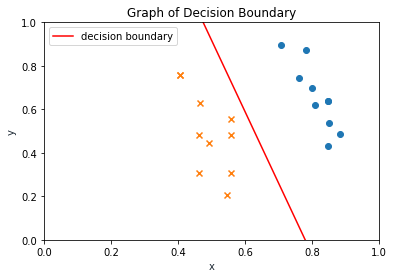

In [70]:
plt_decision_boundary()